<a href="https://colab.research.google.com/github/HesamShaelaie/444-Project/blob/main/Code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import findspark
findspark.init()
import random
import pyspark

In [ ]:
import os
lehighId =  'Team7' # Put here your Lehigh Id

config = pyspark.SparkConf().set('spark.executor.memory', '1024M')\
            .set('spark.cores.max', '20')\
            .set('spark.port.maxRetries','200')\
            .set('spark.ui.port', 4040 + hash(random.random())%200)\
            .set('spark.master', 'spark://polyp1:7077')\
            .set('spark.app.name', lehighId+" Project #1")

ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()
sc = ss.sparkContext

## <center> <font color=brown> Own Work Declaration </font> </center>
### <font color=red> The first page of your group report has to contain declaration, that the work is yours. It has to contain following text (without this declaration we will not consider your solution): </font>

### <font color=blue> "We declare that all work submitted for final evaluation in this project is our own work and does not involve pla- giarism or collaboration outside of our own team. We also declare that we have not discussed the problems and/or solutions with anyone." </font>

## <center> <font color=brown> Citibike Bikeshare Trips for New York and New Jersey </font> </center>

In this project, we will work with the data collected by the NYC Bike Share, LLC and Jersey City Bike Share, LLC (https://www.citibikenyc.com/) about bikeshare trips. This data comes from their bikeshare program running in New York **(Manhattan, Brooklyn, Queens, and the Bronx)** and New Jersey **(Jersey City)** areas. We will use the data from **September 2019** for almost all the tasks. Here is the page for finding this data and additional information:

> https://www.citibikenyc.com/system-data

Data is located in the `/scratch/ISE495/bike_data/` folder. These are the files available to you.
1.   `/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv` containing data for individual bike trips for the New York city area.
2.   `/scratch/ISE495/bike_data/citibike_tripdata-201909-JC.csv` containing data for individual bike trips for the Jersey city area.
3.   `/scratch/ISE495/bike_data/station_information.json` containing data related to all bike stations. This data was gathered on **September 29, 2020**.
4.   `/scratch/ISE495/bike_data/system_regions.json` containing IDs corresponding to various regions into which the bike stations are categorized as mentioned under `region_id` in `system_information.json`.

The headers in these files are self-explanatory. Description about these headers is also available at https://www.citibikenyc.com/system-data and https://github.com/NABSA/gbfs/blob/master/gbfs.md.

**Note: You may need to merge both NYC and JC datasets for most of the tasks. But, do as needed depending on the task.**

Use Apache Spark to finish the following tasks. Most of these tasks <font color=red> do NOT </font> have unique solutions. The answers can be quite flexible and creative. **We will grade your solution based on your creativity as well :).** So for those open questions, remember to write your ideas as well as thought process in your report in addition to listing your conclusions.

You are also free to create any extra features you need based on the data file. For example, you may need to create <code>start_hour</code> as a new feature based on the <code>starttime</code> column for individual bike trips.

<font color=blue> You can also augument the data with e.g. weather, events, etc. </font>

<font color=green> You are free to make *reasonable* assumptions for any task keeping the spirit of the question intact. That is, do not make assumptions simply because a given task is hard to solve :). </font>

Feel free to contact T.A. and the professor in case of any doubts.

<font color=DarkBlue> Think of yourself as a consultant to the Citibike company, and that you are presenting your analysis to semi-technical or non-technical personnel. So, remember that simply writing some code and presenting a bunch of numbers is useless almost all the time. You need to present your analysis, observations, output, etc, in such a way that it is received well by the personnel. Try to practice this in your group written report. </font>

In [ ]:
# File paths
NYCTripDataPath = sc.textFile("/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv")
JCTripDataPath = sc.textFile("/scratch/ISE495/bike_data/citibike_tripdata-201909-JC.csv")
stationDataPath = sc.textFile("/scratch/ISE495/bike_data/station_information.json")
regionDataPath = sc.textFile("/scratch/ISE495/bike_data/system_regions.json")

In [ ]:
! head "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"

"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
327,"2019-09-01 00:00:01.9580","2019-09-01 00:05:29.3410",3733,"Avenue C & E 18 St",40.730563,-73.973984,504,"1 Ave & E 16 St",40.73221853,-73.98165557,39213,"Subscriber",1968,1
1145,"2019-09-01 00:00:04.1430","2019-09-01 00:19:09.8360",3329,"Degraw St & Smith St",40.6829151,-73.99318208,270,"Adelphi St & Myrtle Ave",40.69308257,-73.97178913,21257,"Customer",1969,0
1293,"2019-09-01 00:00:07.3090","2019-09-01 00:21:40.7580",3168,"Central Park West & W 85 St",40.78472675,-73.96961715,423,"W 54 St & 9 Ave",40.76584941,-73.98690506,15242,"Customer",1969,0
1753,"2019-09-01 00:00:08.0640","2019-09-01 00:29:21.5040",3299,"E 98 St & Park Ave",40.78813,-73.95206,3160,"Central Park West & W 76 St",40.77896784,-73.97374737,38760,"Subscriber",1990,

In [ ]:
! head "/scratch/ISE495/bike_data/citibike_tripdata-201909-JC.csv"

"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
145,"2019-09-01 00:00:37.6920","2019-09-01 00:03:03.0100",3640,"Journal Square",40.73367,-74.0625,3206,"Hilltop",40.7311689,-74.0575736,29303,"Subscriber",1991,1
212,"2019-09-01 00:03:00.6000","2019-09-01 00:06:33.3420",3194,"McGinley Square",40.7253399253558,-74.06762212514877,3679,"Bergen Ave",40.722103786686034,-74.07145500183105,29297,"Subscriber",1993,2
569,"2019-09-01 00:07:13.0020","2019-09-01 00:16:42.8610",3214,"Essex Light Rail",40.7127742,-74.0364857,3184,"Paulus Hook",40.7141454,-74.0335519,29435,"Customer",1977,1
1380,"2019-09-01 00:07:25.3350","2019-09-01 00:30:26.1640",3214,"Essex Light Rail",40.7127742,-74.0364857,3792,"Columbus Dr at Exchange Pl",40.71687,-74.03281,29509,"Subscriber",1965,1
1346,"2019-09-01 00:07:56.467

In [ ]:
! head "/scratch/ISE495/bike_data/station_information.json"

{"station_id":"3210","capacity":18,"eightd_has_key_dispenser":false,"eightd_station_services":[],"electric_bike_surcharge_waiver":false,"external_id":"66dd8043-0aca-11e7-82f6-3863bb44ef7c","has_kiosk":true,"lat":40.742677141,"legacy_id":"3210","lon":-74.051788633,"name":"Pershing Field","rental_methods":["KEY","CREDITCARD"],"rental_url":"http://app.citibikenyc.com/S6Lr/IBV092JufD?station_id=3210","short_name":"JC024","station_type":"classic","region_id":"70"}
{"station_id":"3414","capacity":33,"eightd_has_key_dispenser":false,"eightd_station_services":[],"electric_bike_surcharge_waiver":false,"external_id":"66de5a47-0aca-11e7-82f6-3863bb44ef7c","has_kiosk":true,"lat":40.680944723477296,"legacy_id":"3414","lon":-73.97567331790923,"name":"Bergen St & Flatbush Ave","rental_methods":["KEY","CREDITCARD"],"rental_url":"http://app.citibikenyc.com/S6Lr/IBV092JufD?station_id=3414","short_name":"4281.08","station_type":"classic","region_id":"73"}
{"station_id":"3606","capacity":21,"eightd_has_ke

In [ ]:
! head "/scratch/ISE495/bike_data/system_regions.json"

[{"region_id":"70","name":"JC District"},{"region_id":"72","name":"Manhattan"},{"region_id":"73","name":"Brooklyn"},{"region_id":"74","name":"Queens"},{"region_id":"75","name":"The Bronx"}]


# <font color=brown> Note </font>

We use this notation throughout this project:

*   `NYC` denotes the combination of all New York boroughs available in this dataset (Manhattan, Brooklyn, Queens, and the Bronx).
*   `JC` denotes the Jersey City.



# <font color=brown> Task 1 [10 pts.]: Getting Familiar with the Data </font>

Basic info such as # of trips, # of attributes per trip, max/min trip durations, age-wise division, gender-wise division, # of bike stations, # of attributes per bike station, # of regions, etc.

In [ ]:
# Task 1 code here
from pyspark.sql.types import *

NYCTripDataPath = "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"
NYCTripDataPath = sc.parallelize(NYCTripDataPath)

In [ ]:
# Remove headers
NYCHeader = NYCTripDataPath.first()
NYCTripDataPath = NYCTripDataPath.filter(lambda line : line != NYCHeader)

JCHeader = JCTripDataPath.first()
JCTripDataPath = JCTripDataPath.filter(lambda line : line != JCHeader)

In [ ]:
from pyspark.sql.types import *

splitNYCTripDataPath = NYCTripDataPath.map(lambda l: l.split(","))
# Each line is converted to a tuple.
NYCTuples = splitNYCTripDataPath.map(lambda p: (float(p[0]), p[1], p[2], float(p[3]), p[4], float(p[5]), float(p[6]), float(p[7]),
                                      (p[8]), float(p[9]), float(p[10]), float(p[11]),
                                     p[12], float(p[13]), (p[14])))

# The schema is encoded in a string.
fl     = [StructField('tripduration', FloatType(),True),
          StructField('starttime', StringType(), True),
          StructField('stoptime', StringType(), True),
          StructField('start station id', FloatType(), True),
          StructField('start station name', StringType(), True),
          StructField('start station latitude', FloatType(), True),
          StructField('start station longitude', FloatType(), True),
          StructField('end station id', FloatType(), True),
          StructField('end station name', StringType(), True),
          StructField('end station latitude', FloatType(), True),
          StructField('end station longitude', FloatType(), True),
          StructField('bikeid', FloatType(), True),
          StructField('usertype', StringType(), True),
          StructField('birth year', FloatType(), True),
          StructField('gender', StringType(), True)]

schema = StructType(fl)

NYCDF = ss.createDataFrame(NYCTuples, schema)
NYCDF.printSchema()
NYCDF.show()

root
 |-- tripduration: float (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- start station id: float (nullable = true)
 |-- start station name: string (nullable = true)
 |-- start station latitude: float (nullable = true)
 |-- start station longitude: float (nullable = true)
 |-- end station id: float (nullable = true)
 |-- end station name: string (nullable = true)
 |-- end station latitude: float (nullable = true)
 |-- end station longitude: float (nullable = true)
 |-- bikeid: float (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth year: float (nullable = true)
 |-- gender: string (nullable = true)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+
|tripduration|           starttime|            stoptim

In [ ]:
splitJCTripDataPath = JCTripDataPath.map(lambda l: l.split(","))
# Each line is converted to a tuple.
JCTuples = splitJCTripDataPath.map(lambda p: (float(p[0]), p[1], p[2], float(p[3]), p[4], float(p[5]), float(p[6]), float(p[7]),
                                      (p[8]), float(p[9]), float(p[10]), float(p[11]),
                                     p[12], float(p[13]), (p[14])))

# The schema is encoded in a string.
fl     = [StructField('tripduration', FloatType(),True),
          StructField('starttime', StringType(), True),
          StructField('stoptime', StringType(), True),
          StructField('start station id', FloatType(), True),
          StructField('start station name', StringType(), True),
          StructField('start station latitude', FloatType(), True),
          StructField('start station longitude', FloatType(), True),
          StructField('end station id', FloatType(), True),
          StructField('end station name', StringType(), True),
          StructField('end station latitude', FloatType(), True),
          StructField('end station longitude', FloatType(), True),
          StructField('bikeid', FloatType(), True),
          StructField('usertype', StringType(), True),
          StructField('birth year', FloatType(), True),
          StructField('gender', StringType(), True)]

schema = StructType(fl)

JCDF = ss.createDataFrame(JCTuples, schema)
JCDF.printSchema()
JCDF.show()

root
 |-- tripduration: float (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- start station id: float (nullable = true)
 |-- start station name: string (nullable = true)
 |-- start station latitude: float (nullable = true)
 |-- start station longitude: float (nullable = true)
 |-- end station id: float (nullable = true)
 |-- end station name: string (nullable = true)
 |-- end station latitude: float (nullable = true)
 |-- end station longitude: float (nullable = true)
 |-- bikeid: float (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth year: float (nullable = true)
 |-- gender: string (nullable = true)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+
|tripduration|           starttime|            stoptim

In [ ]:
JCDFremovingOutliers.describe('tripduration').show()

In [ ]:
JCDFremovingOutliers = JCDF.select('*').where("tripduration <= '86400'")
JCDFremovingOutliers.count()

49228

In [ ]:
NYCDFremovingOutliers = NYCDF.select('*').where("tripduration <= '86400'")
NYCDFremovingOutliers.count()

2444309

In [ ]:
NYCDFremovingOutliers.describe('tripduration').show()

+-------+------------------+
|summary|      tripduration|
+-------+------------------+
|  count|           2444309|
|   mean| 907.0694441660199|
| stddev|1316.7078513962024|
|    min|              61.0|
|    max|           86332.0|
+-------+------------------+



In [ ]:
JCDFremovingOutliers.describe('tripduration').show()

+-------+------------------+
|summary|      tripduration|
+-------+------------------+
|  count|             49228|
|   mean| 685.0111521898107|
| stddev|1903.5022774893205|
|    min|              61.0|
|    max|           83654.0|
+-------+------------------+



In [ ]:
JCDFmeanstartime = JCDF.select('starttime','tripduration')

In [ ]:
JCTuples

PythonRDD[58] at RDD at PythonRDD.scala:53

In [ ]:
NYCMaleRiders = NYCDF.select('*').where("gender = '1'").count()
NYCFemaleRiders = NYCDF.select('*').where("gender = '2'").count()
NYCUnknownRiders = NYCDF.select('*').where("gender = '0'").count()
print(NYCMaleRiders)
print(NYCFemaleRiders)
print(NYCUnknownRiders)

1612056
626859
205985


In [ ]:
# Riders gender wise distribution for JC
JCMaleRiders = JCDF.select('*').where("gender = '1'").count()
JCFemaleRiders = JCDF.select('*').where("gender = '2'").count()
JCUnknownRiders = JCDF.select('*').where("gender = '0'").count()
print(JCMaleRiders)
print(JCFemaleRiders)
print(JCUnknownRiders)

33417
12049
3778


In [ ]:
NYCTuples = NYCTripDataPath.map(lambda line: (line.split(",")[0:]))
JCTuples = JCTripDataPath.map(lambda line: (line.split(",")[0:]))

In [ ]:
# Riders age wise distribution for NYC (10 years gap)
NYCRidersagegroup1 = NYCTuples.filter(lambda line: int(line[13]) > 2010 and int(line[13]) <= 2020).cache()
NYCRidersagegroup2 = NYCTuples.filter(lambda line: int(line[13]) < 2010 and int(line[13]) >= 2000).cache()
NYCRidersagegroup3 = NYCTuples.filter(lambda line: int(line[13]) < 2000 and int(line[13]) >= 1990).cache()
NYCRidersagegroup4 = NYCTuples.filter(lambda line: int(line[13]) < 1990 and int(line[13]) >= 1980).cache()
NYCRidersagegroup5 = NYCTuples.filter(lambda line: int(line[13]) < 1980 and int(line[13]) >= 1970).cache()
NYCRidersagegroup6 = NYCTuples.filter(lambda line: int(line[13]) < 1970 and int(line[13]) >= 1960).cache()
NYCRidersagegroup7 = NYCTuples.filter(lambda line: int(line[13]) < 1960 and int(line[13]) >= 1950).cache()
NYCRidersagegroup8 = NYCTuples.filter(lambda line: int(line[13]) < 1950 and int(line[13]) >= 1940).cache()
NYCRidersagegroup9 = NYCTuples.filter(lambda line: int(line[13]) < 1940 and int(line[13]) >= 1930).cache()
NYCRidersagegroup10 = NYCTuples.filter(lambda line: int(line[13]) < 1930 and int(line[13]) >= 1920).cache()
NYCRidersagegroup11 = NYCTuples.filter(lambda line: int(line[13]) < 1920 and int(line[13]) >= 1910).cache()
NYCRidersagegroup12 = NYCTuples.filter(lambda line: int(line[13]) < 1910 and int(line[13]) >= 1900).cache()
NYCRidersagegroup13 = NYCTuples.filter(lambda line: int(line[13]) < 1900 and int(line[13]) >= 1890).cache()
NYCRidersagegroup14 = NYCTuples.filter(lambda line: int(line[13]) < 1890 and int(line[13]) >= 1880).cache()
NYCRidersagegroup15 = NYCTuples.filter(lambda line: int(line[13]) < 1880 and int(line[13]) >= 1870).cache()
NYCRidersagegroup16 = NYCTuples.filter(lambda line: int(line[13]) < 1870 and int(line[13]) >= 1860).cache()
print(NYCRidersagegroup1.count(), NYCRidersagegroup2.count(), NYCRidersagegroup3.count(), NYCRidersagegroup4.count(), NYCRidersagegroup5.count(), NYCRidersagegroup6.count(),NYCRidersagegroup7.count(),NYCRidersagegroup8.count(), NYCRidersagegroup9.count(), NYCRidersagegroup10.count(), NYCRidersagegroup11.count(), NYCRidersagegroup12.count(),NYCRidersagegroup13.count(),NYCRidersagegroup14.count(), NYCRidersagegroup15.count(), NYCRidersagegroup16.count())

0 30537 690710 737810 394758 469892 102257 15915 1839 116 185 400 133 346 2 0


In [ ]:
# Year wise distribution for JC customers  .......
NYCDF.groupBy('birth year').agg({'*' : 'count'}).sort('birth year').collect()

[Row(birth year=1874.0, count(1)=2),
 Row(birth year=1885.0, count(1)=44),
 Row(birth year=1886.0, count(1)=24),
 Row(birth year=1887.0, count(1)=20),
 Row(birth year=1888.0, count(1)=130),
 Row(birth year=1889.0, count(1)=128),
 Row(birth year=1890.0, count(1)=64),
 Row(birth year=1891.0, count(1)=1),
 Row(birth year=1893.0, count(1)=33),
 Row(birth year=1895.0, count(1)=2),
 Row(birth year=1896.0, count(1)=27),
 Row(birth year=1899.0, count(1)=6),
 Row(birth year=1900.0, count(1)=316),
 Row(birth year=1901.0, count(1)=77),
 Row(birth year=1907.0, count(1)=5),
 Row(birth year=1909.0, count(1)=2),
 Row(birth year=1910.0, count(1)=18),
 Row(birth year=1911.0, count(1)=14),
 Row(birth year=1912.0, count(1)=18),
 Row(birth year=1913.0, count(1)=2),
 Row(birth year=1915.0, count(1)=13),
 Row(birth year=1917.0, count(1)=48),
 Row(birth year=1918.0, count(1)=19),
 Row(birth year=1919.0, count(1)=53),
 Row(birth year=1920.0, count(1)=1),
 Row(birth year=1921.0, count(1)=11),
 Row(birth year=1

In [ ]:
# Riders age wise distribution for JC (10 years gap)
JCRidersagegroup1 = JCTuples.filter(lambda line: int(line[13]) > 2010 and int(line[13]) <= 2020).cache()
JCRidersagegroup2 = JCTuples.filter(lambda line: int(line[13]) < 2010 and int(line[13]) >= 2000).cache()
JCRidersagegroup3 = JCTuples.filter(lambda line: int(line[13]) < 2000 and int(line[13]) >= 1990).cache()
JCRidersagegroup4 = JCTuples.filter(lambda line: int(line[13]) < 1990 and int(line[13]) >= 1980).cache()
JCRidersagegroup5 = JCTuples.filter(lambda line: int(line[13]) < 1980 and int(line[13]) >= 1970).cache()
JCRidersagegroup6 = JCTuples.filter(lambda line: int(line[13]) < 1970 and int(line[13]) >= 1960).cache()
JCRidersagegroup7 = JCTuples.filter(lambda line: int(line[13]) < 1960 and int(line[13]) >= 1950).cache()
JCRidersagegroup8 = JCTuples.filter(lambda line: int(line[13]) < 1950 and int(line[13]) >= 1940).cache()
JCRidersagegroup9 = JCTuples.filter(lambda line: int(line[13]) < 1940 and int(line[13]) >= 1930).cache()
JCRidersagegroup10 = JCTuples.filter(lambda line: int(line[13]) < 1930 and int(line[13]) >= 1920).cache()
JCRidersagegroup11 = JCTuples.filter(lambda line: int(line[13]) < 1920 and int(line[13]) >= 1910).cache()
print(JCRidersagegroup1.count(), JCRidersagegroup2.count(), JCRidersagegroup3.count(), JCRidersagegroup4.count(), JCRidersagegroup5.count(), JCRidersagegroup6.count(),JCRidersagegroup7.count(),JCRidersagegroup8.count(), JCRidersagegroup9.count(), JCRidersagegroup10.count(), JCRidersagegroup11.count())

0 161 11550 20335 8449 7249 1403 69 0 0 0


In [ ]:
# Year wise distribution for JC customers  .......
JCDF.groupBy('birth year').agg({'*' : 'count'}).sort('birth year').collect()

[Row(birth year=1888.0, count(1)=23),
 Row(birth year=1900.0, count(1)=5),
 Row(birth year=1941.0, count(1)=7),
 Row(birth year=1944.0, count(1)=5),
 Row(birth year=1946.0, count(1)=2),
 Row(birth year=1947.0, count(1)=13),
 Row(birth year=1949.0, count(1)=42),
 Row(birth year=1950.0, count(1)=12),
 Row(birth year=1951.0, count(1)=56),
 Row(birth year=1952.0, count(1)=44),
 Row(birth year=1953.0, count(1)=87),
 Row(birth year=1954.0, count(1)=186),
 Row(birth year=1955.0, count(1)=75),
 Row(birth year=1956.0, count(1)=255),
 Row(birth year=1957.0, count(1)=101),
 Row(birth year=1958.0, count(1)=319),
 Row(birth year=1959.0, count(1)=268),
 Row(birth year=1960.0, count(1)=292),
 Row(birth year=1961.0, count(1)=157),
 Row(birth year=1962.0, count(1)=378),
 Row(birth year=1963.0, count(1)=516),
 Row(birth year=1964.0, count(1)=592),
 Row(birth year=1965.0, count(1)=193),
 Row(birth year=1966.0, count(1)=319),
 Row(birth year=1967.0, count(1)=458),
 Row(birth year=1968.0, count(1)=630),
 R

In [ ]:
# NO of subscribers nd customers NYC .......
NYCDF.groupBy('usertype').agg({'*' : 'count'}).collect()

[Row(usertype='"Customer"', count(1)=434407),
 Row(usertype='"Subscriber"', count(1)=2010493)]

In [ ]:
# NO of subscribers nd customers JC .......
JCDF.groupBy('usertype').agg({'*' : 'count'}).collect()

[Row(usertype='"Customer"', count(1)=7388),
 Row(usertype='"Subscriber"', count(1)=41856)]

In [ ]:
# stationDataPath = sc.textFile("/scratch/ISE495/bike_data/station_information.json")
# no of bike stations
StationNos = stationDataPath.map(lambda s: s.split(",")).map(lambda s: s[0]).map(lambda s: s[-5:-1]).map(lambda s: (s,1)).reduceByKey(lambda a,b: a+b)
StationNos.count()

1169

In [ ]:
AttperStation = stationDataPath.map(lambda s: s.split(",")).map(lambda s: len(s))
AttperStation.take(1)

[17]

# <font color=brown> Task 2 [20 pts.]: Histograms </font>

Plot histograms for the trip durations. There are different approaches for plotting a histogram in python. Use the following two approaches for this task. Time these approaches to observe which one is faster.

1.   Using `matplotlib.pyplot.hist()` function. This is the usual python approach.
2.   Using `pyspark.RDD.histogram()` function. This is based on the Spark's map-reduce framework. This function allows us to generate lists of bins and frequencies required for the histogram. Then, we can use these lists to plot a regular bar plot via `matplotlib.pyplot.bar()` function.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


HISTOGRAM PLOT FOR NYC DATASET

In [ ]:
NYCTRIPS = NYCDF.select('tripduration')
NYCTRIPS.show()

In [ ]:
TotalNYCTrips = list(NYCDF.select('tripduration').toPandas()['tripduration'])

In [ ]:
TotalNYCTrips = [int(i) for i in TotalNYCTrips]

In [ ]:
TNTrdd = sc.parallelize(TotalNYCTrips)

In [ ]:
hist = TNTrdd.histogram([i*60 for i in range(150)])
hist

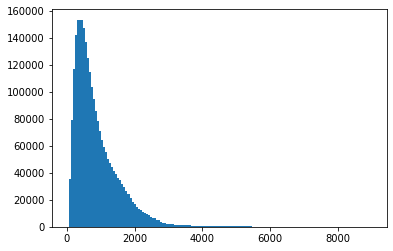

In [ ]:
import time
st=time.time()
plt.bar(hist[0][1:], hist[1], width=[100])
KTcodetime=time.time()-st

In [ ]:
print(KTcodetime)

0.28359222412109375


In [ ]:
hist2 = TNTrdd.histogram([i*20 for i in range(200)])
mins = [(i/60) for i in hist2[0]]


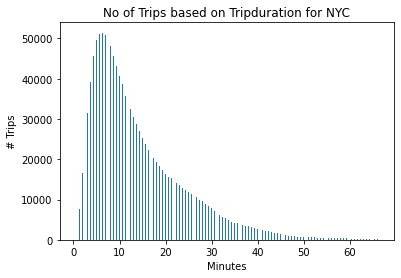

In [ ]:
import time
st=time.time()
plt.bar(mins[1:], hist2[1], width=[0.1])
plt.xlabel("Minutes")
plt.ylabel("# Trips")
plt.title('No of Trips based on Tripduration for NYC')
KTcodetime=time.time()-st

In [ ]:
KTcodetime

0.4868288040161133

In [ ]:
# Using matplotlib.pyplot.hist() function. This is the usual python approach.

In [ ]:
TotalNYCTripsmatplot = list(NYCDF.select('tripduration').toPandas()['tripduration'])

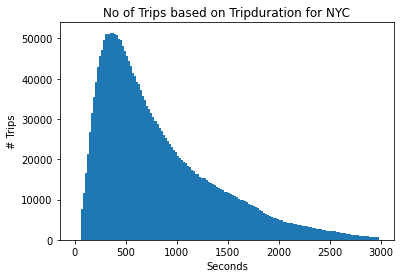

In [ ]:
import time
st=time.time()
plt.hist(TotalNYCTripsmatplot, bins=[ i*20 for i in range(150)])
plt.xlabel("Seconds")
plt.ylabel("# Trips")
plt.title('No of Trips based on Tripduration for NYC')
plt.show()
KTcodetime=time.time()-st

In [ ]:
KTcodetime

29.78404474258423

HISTOGRAM PLOTS FOR JC DATASET

In [ ]:
JCTRIPS = JCDF.select('tripduration')
JCTRIPS.show()

In [ ]:
TotalJCTrips = list(JCDF.select('tripduration').toPandas()['tripduration'])
TotalJCTrips = [int(i) for i in TotalJCTrips]

In [ ]:
TNTrdd1 = sc.parallelize(TotalJCTrips)

In [ ]:
hist1JC = TNTrdd1.histogram([i*60 for i in range(60)])
hist1JC

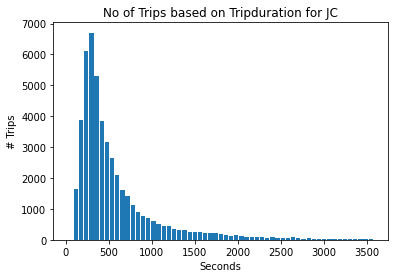

In [ ]:
import time
st=time.time()
plt.bar(hist1JC[0][1:], hist1JC[1], width=[50])
plt.xlabel("Seconds")
plt.ylabel("# Trips")
plt.title('No of Trips based on Tripduration for JC')
KTcodetime=time.time()-st

In [ ]:
KTcodetime

0.11540555953979492

In [ ]:
# Using matplotlib.pyplot.hist() function. This is the usual python approach.

In [ ]:
TotalJCTripsmatplot = list(JCDF.select('tripduration').toPandas()['tripduration'])

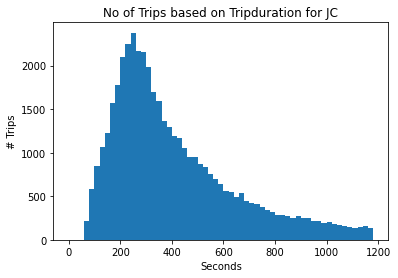

In [ ]:
import time
st=time.time()
plt.hist(TotalJCTripsmatplot, bins=[ i*20 for i in range(60)])
plt.xlabel("Seconds")
plt.ylabel("# Trips")
plt.title('No of Trips based on Tripduration for JC')
KTcodetime=time.time()-st
plt.show()

In [ ]:
KTcodetime

0.7086567878723145

# <font color=brown> Task 3 [20 pts.]: Mean Trip Durations </font>

Report mean trip durations grouped by starting hour of day. Any interesting observations?

**Again, you can do more than we ask – be creative :).**

In [ ]:
JCDFmeanstartime

In [ ]:
# JCMeanTripDuration = JCDFmeanstartime.rdd
# JCMeanTripDuration.take(4)

In [ ]:
# JCMeanTripDurationSplit = JCMeanTripDuration.map(lambda s: s.split(' ')[0:1])
# JCMeanTripDurationSplit.take(3)

In [ ]:
JCTripDataPath.take(4)

In [ ]:
# To find the start time and trip duration, we made a tuple of the start hour and trip duration
StartTimeDurationTupJC = JCTripDataPath.map(lambda s: (s.split()[1][0:2],s.split(',')[0])).cache()

In [ ]:
StartTimeDurationTupJC.take(3)

[('00', '145'), ('00', '212'), ('00', '569')]

In [ ]:
TotTripsHour = StartTimeDurationTupJC.map(lambda k: (k[0],1)).reduceByKey(lambda a,b: a+b)
TimeTripHour = StartTimeDurationTupJC.map(lambda k: (k[0],int(k[1]))).reduceByKey(lambda a,b: a+b)

In [ ]:
TotTripsHour.sortBy(lambda s:s[1]).collect()

In [ ]:
# Mean trip duration by the start hour of day
JCMeanTripCal = TotTripsHour.join(TimeTripHour).map(lambda k: (k[0],k[1][0],k[1][1]/k[1][0])).sortBy(lambda s:s[0]).cache()

In [ ]:
JCMeanTripCal.toDF(['Hour','# Trips','Mean Trip Time']).show(25, False)


+----+-------+------------------+
|Hour|# Trips|Mean Trip Time    |
+----+-------+------------------+
|00  |363    |3735.3939393939395|
|01  |204    |1831.5392156862745|
|02  |113    |1198.5575221238937|
|03  |87     |3932.9540229885056|
|04  |103    |1044.7669902912621|
|05  |465    |423.7806451612903 |
|06  |1384   |423.2348265895954 |
|07  |3521   |408.3717693836978 |
|08  |5168   |506.4870356037152 |
|09  |2748   |565.9148471615721 |
|10  |1917   |836.529473135107  |
|11  |2133   |936.1073605250821 |
|12  |2343   |894.1741357234315 |
|13  |2379   |882.4064733081127 |
|14  |2062   |1069.3816682832203|
|15  |2161   |1056.795465062471 |
|16  |2761   |972.3636363636364 |
|17  |4901   |932.1497653540093 |
|18  |5283   |630.8205565019875 |
|19  |3537   |732.9985863726322 |
|20  |2395   |1411.286847599165 |
|21  |1574   |662.6067344345616 |
|22  |1070   |920.9551401869159 |
|23  |572    |622.5944055944055 |
+----+-------+------------------+



In [ ]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import col
nycdf = NYCDF.withColumn("year", col('starttime')[2:7])
nycdf.show()


+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+-------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude| bikeid|    usertype|birth year|gender|   year|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+-------+
|       327.0|"2019-09-01 00:00...|"2019-09-01 00:05...|          3733.0|"Avenue C & E 18 St"|             40.730564|              -73.97398|         504.0|   "1 Ave & E 16 St"|            40.7322

In [ ]:
NYCTripDataPath.take(4)

In [ ]:
# To find the start time and trip duration, we made a tuple of the start hour and trip duration
StartTimeDurationTupNYC = NYCTripDataPath.map(lambda s: (s.split()[1][0:2],s.split(',')[0])).cache()

In [ ]:
StartTimeDurationTupNYC.take(3)

[('00', '327'), ('00', '1145'), ('00', '1293')]

In [ ]:
TotTripsHour = StartTimeDurationTupNYC.map(lambda k: (k[0],1)).reduceByKey(lambda a,b: a+b)
TimeTripHour = StartTimeDurationTupNYC.map(lambda k: (k[0],int(k[1]))).reduceByKey(lambda a,b: a+b)

In [ ]:
NYCMeanTripCal = TotTripsHour.join(TimeTripHour).map(lambda k: (k[0],k[1][0],k[1][1]/k[1][0])).sortBy(lambda s:s[0]).cache()

In [ ]:
# Mean trip duration for NYC datasetbased on start hour
NYCMeanTripCal.toDF(['Hour','# Trips','Mean Trip Time']).show(25, False)

+----+-------+------------------+
|Hour|# Trips|Mean Trip Time    |
+----+-------+------------------+
|00  |23370  |1154.6829696191699|
|01  |13537  |1516.7924946443081|
|02  |8416   |1355.9044676806084|
|03  |5543   |1567.367670936316 |
|04  |5539   |1373.9050370102907|
|05  |16096  |698.0184517892644 |
|06  |50647  |667.1403044602839 |
|07  |110758 |767.4937250582351 |
|08  |189034 |815.2298739909222 |
|09  |147276 |888.2625003394986 |
|10  |110499 |982.4436420239098 |
|11  |115637 |1111.0008561273642|
|12  |132997 |1056.2833071422663|
|13  |136958 |1068.2957914105054|
|14  |140905 |1130.8229445370994|
|15  |147334 |1110.3457654037763|
|16  |170801 |1029.0915217124023|
|17  |245732 |1019.621673204955 |
|18  |235855 |1011.0078862012678|
|19  |157932 |1050.1187283134514|
|20  |106031 |1085.4975997585611|
|21  |77401  |1059.7193188718493|
|22  |57845  |1154.5759184026276|
|23  |38757  |1110.6486312150064|
+----+-------+------------------+



# <font color=brown> Task 4 [30 pts.]: Initial Impression </font>

1.   Find some interesting observations for bike trips based on the customer type, gender, age, etc.
2.   Similarly, find some interesting observations for bike stations based on various attributes provided to you.

In [ ]:
path = "/scratch/ISE495/bike_data/station_information.json"
stationDF = ss.read.json(path)
stationDF.printSchema()
stationDF.show()

root
 |-- capacity: long (nullable = true)
 |-- eightd_has_key_dispenser: boolean (nullable = true)
 |-- eightd_station_services: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- bikes_availability: string (nullable = true)
 |    |    |-- description: string (nullable = true)
 |    |    |-- docks_availability: string (nullable = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- link_for_more_info: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- off_dock_bikes_count: long (nullable = true)
 |    |    |-- off_dock_remaining_bike_capacity: long (nullable = true)
 |    |    |-- schedule_description: string (nullable = true)
 |    |    |-- service_type: string (nullable = true)
 |-- electric_bike_surcharge_waiver: boolean (nullable = true)
 |-- external_id: string (nullable = true)
 |-- has_kiosk: boolean (nullable = true)
 |-- lat: double (nullable = true)
 |-- legacy_id: string (nullable = true)
 |-

In [ ]:
JCDF.show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude| bikeid|    usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+------------+----------+------+
|       145.0|"2019-09-01 00:00...|"2019-09-01 00:03...|          3640.0|    "Journal Square"|              40.73367|               -74.0625|        3206.0|           "Hilltop"|            40.73117|            -74.05757|

In [ ]:
EarlyMornigRidesJC = JCTripDataPath.map(lambda s: (s.split()[1][0:2],s.split(',')[0],s.split(',')[12],s.split(',')[13],s.split(',')[14])).cache()

In [ ]:
EarlyMornigRidesJC.take(4)

[('00', '145', '"Subscriber"', '1991', '1'),
 ('00', '212', '"Subscriber"', '1993', '2'),
 ('00', '569', '"Customer"', '1977', '1'),
 ('00', '1380', '"Subscriber"', '1965', '1')]

In [ ]:
EarlyMornDF = EarlyMornigRidesJC.toDF(['Hour','# Trips','usertype','birth year','gender'])
EarlyMornDF.show(5)

+----+-------+------------+----------+------+
|Hour|# Trips|    usertype|birth year|gender|
+----+-------+------------+----------+------+
|  00|    145|"Subscriber"|      1991|     1|
|  00|    212|"Subscriber"|      1993|     2|
|  00|    569|  "Customer"|      1977|     1|
|  00|   1380|"Subscriber"|      1965|     1|
|  00|   1346|"Subscriber"|      1968|     2|
+----+-------+------------+----------+------+
only showing top 5 rows



In [ ]:
EarlyMornRDD = EarlyMornDF.rdd.map(tuple)
EarlyMornRDD.count()

49244

In [ ]:
EarlyMornRDD.take(4)

[('00', '145', '"Subscriber"', '1991', '1'),
 ('00', '212', '"Subscriber"', '1993', '2'),
 ('00', '569', '"Customer"', '1977', '1'),
 ('00', '1380', '"Subscriber"', '1965', '1')]

In [ ]:
# JC dataset morning hours gender wise & customer type divison
a01 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '1')
b02 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '2')
c03 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '0')
a04 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '1')
b05 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '2')
c06 = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '0')

print(a01.count(), b02.count(), c03.count(), a04.count(), b05.count(), c06.count())

8541 3032 267 480 183 318


In [ ]:
# JC dataset evening hours gender wise & customer type divison
a10 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '1')
b11 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '2')
c12 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '0')
a13 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '1')
b14 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '2')
c15 = EarlyMornRDD.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '0')
print(a10.count(), b11.count(), c12.count(), a13.count(), b14.count(), c15.count())

10259 3486 339 983 537 878


In [ ]:
# Finding max staion usage during month of 2019 for JC Data i.e - Station ID - 3186
JCDF.groupBy('start station id').agg({'*' : 'count'}).sort('count(1)').collect()

[Row(start station id=3201.0, count(1)=85),
 Row(start station id=3694.0, count(1)=122),
 Row(start station id=3191.0, count(1)=152),
 Row(start station id=3281.0, count(1)=228),
 Row(start station id=3212.0, count(1)=260),
 Row(start station id=3196.0, count(1)=263),
 Row(start station id=3677.0, count(1)=277),
 Row(start station id=3206.0, count(1)=279),
 Row(start station id=3277.0, count(1)=284),
 Row(start station id=3220.0, count(1)=333),
 Row(start station id=3679.0, count(1)=336),
 Row(start station id=3198.0, count(1)=364),
 Row(start station id=3280.0, count(1)=366),
 Row(start station id=3678.0, count(1)=379),
 Row(start station id=3193.0, count(1)=382),
 Row(start station id=3268.0, count(1)=399),
 Row(start station id=3791.0, count(1)=407),
 Row(start station id=3225.0, count(1)=418),
 Row(start station id=3481.0, count(1)=457),
 Row(start station id=3207.0, count(1)=510),
 Row(start station id=3483.0, count(1)=511),
 Row(start station id=3210.0, count(1)=536),
 Row(start 

In [ ]:
# Finding max staion usage during month of 2019 for NYC data i.e - Station ID - 519
NYCDF.groupBy('start station id').agg({'*' : 'count'}).sort('count(1)').collect()

[Row(start station id=488.0, count(1)=3),
 Row(start station id=3816.0, count(1)=24),
 Row(start station id=3854.0, count(1)=26),
 Row(start station id=3818.0, count(1)=29),
 Row(start station id=3819.0, count(1)=39),
 Row(start station id=3853.0, count(1)=42),
 Row(start station id=3822.0, count(1)=43),
 Row(start station id=3858.0, count(1)=45),
 Row(start station id=3821.0, count(1)=56),
 Row(start station id=3817.0, count(1)=68),
 Row(start station id=3820.0, count(1)=97),
 Row(start station id=2005.0, count(1)=110),
 Row(start station id=3823.0, count(1)=111),
 Row(start station id=3567.0, count(1)=145),
 Row(start station id=3842.0, count(1)=163),
 Row(start station id=3811.0, count(1)=188),
 Row(start station id=3559.0, count(1)=219),
 Row(start station id=3647.0, count(1)=228),
 Row(start station id=3333.0, count(1)=229),
 Row(start station id=3704.0, count(1)=231),
 Row(start station id=3769.0, count(1)=235),
 Row(start station id=3596.0, count(1)=235),
 Row(start station id=3

In [ ]:
#Trial code calculating evening hours gender wise & customer type divison
# alst = []
# blst = []
# for i in range(10):
#   # x1 = i*10
#   x2 = 1921 + (i*10)
#   # print(x2)
#   x3 = 1930 + (i*10)
#   # print(x3)
#   a = EarlyMornRDD.filter(lambda x: x[0] >= 6 and a[0] <=9  and x[2] == '"Customer"' and x[3] >= 1961 and x[3] <= 1970)

#   b = EarlyMornRDD.filter(lambda x: x[0] == 6 and x[2] == '"Subscriber"'and x[3] >= x2 and x[3] <= x3)
#   print(x2,x3, a.count(), b.count())
# # print(alst,blst)

In [ ]:
a = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"'and x[3] >= '1991' and x[3] <= '2000')
b = EarlyMornRDD.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"'and x[3] >= '1991' and x[3] <= '2000')
print(a.count(), b.count())

1975 270


NYC DATASET Age wise description based on hours and customer type



In [ ]:
EarlyMornigRidesNYC = NYCTripDataPath.map(lambda s: (s.split()[1][0:2],s.split(',')[0],s.split(',')[12],s.split(',')[13],s.split(',')[14])).cache()

In [ ]:
EarlyMornDF2 = EarlyMornigRidesNYC.toDF(['Hour','# Trips','usertype','birth year','gender'])
EarlyMornDF2.show(5)

+----+-------+------------+----------+------+
|Hour|# Trips|    usertype|birth year|gender|
+----+-------+------------+----------+------+
|  00|    327|"Subscriber"|      1968|     1|
|  00|   1145|  "Customer"|      1969|     0|
|  00|   1293|  "Customer"|      1969|     0|
|  00|   1753|"Subscriber"|      1990|     1|
|  00|    613|"Subscriber"|      1992|     1|
+----+-------+------------+----------+------+
only showing top 5 rows



In [ ]:
EarlyMornRDD2 = EarlyMornDF2.rdd.map(tuple)
EarlyMornRDD2.count()

2444900

In [ ]:
a1 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"'and x[3] >= '1991' and x[3] <= '2000')
b1 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"'and x[3] >= '1991' and x[3] <= '2000')
a2 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"'and x[3] >= '1981' and x[3] <= '1990')
b2 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"'and x[3] >= '1981' and x[3] <= '1990')
a3 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"'and x[3] >= '1971' and x[3] <= '1980')
b3 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"'and x[3] >= '1971' and x[3] <= '1980')
a4 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"'and x[3] >= '1961' and x[3] <= '1970')
b4 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"'and x[3] >= '1961' and x[3] <= '1970')

print(a1.count(), b1.count(), a2.count(), b2.count(), a3.count(), b3.count(), a4.count(), b4.count())

165759 40862 237867 29695 123698 8996 97327 58300


In [ ]:
# NYC dataset morning hours gender wise & customer type divison
a11 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '1')
b12 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '2')
c13 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Subscriber"' and x[4] == '0')
a21 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '1')
b22 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '2')
c23 = EarlyMornRDD2.filter(lambda x: x[0] >= '06' and x[0] <= '09' and x[2] == '"Customer"' and x[4] == '0')

print(a11.count(), b12.count(), c13.count(), a21.count(), b22.count(), c23.count())

327854 123765 7553 16513 9309 12721


In [ ]:
# NYC dataset evening hours gender wise & customer type divison
a11 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '1')
b12 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '2')
c13 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Subscriber"' and x[4] == '0')
a21 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '1')
b22 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '2')
c23 = EarlyMornRDD2.filter(lambda x: x[0] >= '16' and x[0] <= '19' and x[2] == '"Customer"' and x[4] == '0')
print(a11.count(), b12.count(), c13.count(), a21.count(), b22.count(), c23.count())

482561 175092 11709 53856 32442 54660


# <font color=brown> Task 5 [30 pts.]: Clustering </font>

Cluster the bike stations based on information available in `station_information.json`. Choose the proper number of clusters *k* and report the centroids. Plot these bike stations on a U.S. map (with a different color for each cluster of stations) and mention interesting observations, if any.

**Note:** Do not set the maximal *k* too large in your code. *k* from 2 to 10 should be enough to try.

**Food for thought:** Is *k*-means clustering algorithm suitable for the type of data available for bike stations? Make a reasonable argument with a detailed explanation.

In [ ]:
!pip3 install plotly --user

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pyspark.mllib.clustering import KMeans, KMeansModel
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Spath = "/scratch/ISE495/bike_data/station_information.json"
stationDF = ss.read.json(Spath)
stationDF.printSchema()
stationDF.show(n=4)
type(stationDF)
#lat = ss.sql("SELECT lat FROM stationDF")
#DataLocataion = stationDF.collect()
#for x in DataLocataion:
#  print(x['capacity'])
#  break
#print(DataLocataion['capacity'])
#lat.show()


root
 |-- capacity: long (nullable = true)
 |-- eightd_has_key_dispenser: boolean (nullable = true)
 |-- eightd_station_services: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- bikes_availability: string (nullable = true)
 |    |    |-- description: string (nullable = true)
 |    |    |-- docks_availability: string (nullable = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- link_for_more_info: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- off_dock_bikes_count: long (nullable = true)
 |    |    |-- off_dock_remaining_bike_capacity: long (nullable = true)
 |    |    |-- schedule_description: string (nullable = true)
 |    |    |-- service_type: string (nullable = true)
 |-- electric_bike_surcharge_waiver: boolean (nullable = true)
 |-- external_id: string (nullable = true)
 |-- has_kiosk: boolean (nullable = true)
 |-- lat: double (nullable = true)
 |-- legacy_id: string (nullable = true)
 |-

pyspark.sql.dataframe.DataFrame

In [ ]:
stationDF.select('station_id').distinct().count()

1169

In [ ]:
stationDF.count()

1169

In [ ]:
stationDF.dropna('any').count()

1169

In [ ]:
stationRDD = stationDF.rdd
stationRDDClt = stationRDD.map(lambda a: (a[14],[a[6],a[8]]))
stationRDDClt.take(3)


[('3210', [40.742677141, -74.051788633]),
 ('3414', [40.680944723477296, -73.97567331790923]),
 ('3606', [40.74252, -73.948852])]

In [ ]:
def error(point):
  cluster = clusters.predict(point)
  dif = (  np.linalg.norm( clusters.centers[cluster]-point) ) **2
  return dif

In [ ]:
WSSSEs=[]
n_cluster =10
for k in range(1,n_cluster+1):
  print("clustering with k=",k)
  minWSSE= 1000000000
  for t in range(5):
    clusters = KMeans.train(stationRDDClt.values(), k, maxIterations=10, initializationMode="random")
    WSSSE = stationRDDClt.values().map(error).reduce(lambda a,b: a+b)
    if WSSSE < minWSSE:
      minWSSE = WSSSE
      minIndx = k
  WSSSEs.append(minWSSE)

clustering with k= 1
clustering with k= 2
clustering with k= 3
clustering with k= 4
clustering with k= 5
clustering with k= 6
clustering with k= 7
clustering with k= 8
clustering with k= 9
clustering with k= 10


No handles with labels found to put in legend.


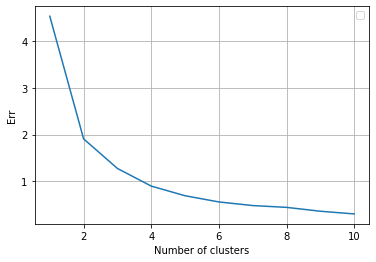

In [ ]:
plt.plot(range(1,n_cluster+1),WSSSEs)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Err')
plt.legend()
plt.show()

In [ ]:
k = 6
minWSSE= 1000000000

for t in range(5):
  clusters = KMeans.train(stationRDDClt.values(), k, maxIterations=10, initializationMode="random")
  WSSSE = stationRDDClt.values().map(error).reduce(lambda a,b: a+b)
  if WSSSE < minWSSE:
    minWSSE = WSSSE
    minClusters = clusters

In [ ]:
#colors = {0:'w',1:'b',2:'g',3:'r',4:'c',5:'m',6:'y',7:'k'}
def ColorToPoint(point):
  index = minClusters.predict(point[1])
  #color = colors[index]
  #return point, index, color
  return point, index

stationRDDClt2 = stationRDDClt.map(ColorToPoint)
stationRDDClt2.take(4)

[(('3210', [40.742677141, -74.051788633]), 0),
 (('3414', [40.680944723477296, -73.97567331790923]), 5),
 (('3606', [40.74252, -73.948852]), 1),
 (('3959', [40.823498, -73.94386]), 3)]

In [ ]:
stationMid = stationRDDClt2.map(lambda a: (a[0][0],a[1]))
stationMid.take(4)


[('3210', 0), ('3414', 5), ('3606', 1), ('3959', 3)]

In [ ]:
StationLst = ss.createDataFrame(stationMid,['station_id','Cluster'])
StationLst.printSchema()
StationLst.show(4)

root
 |-- station_id: string (nullable = true)
 |-- Cluster: long (nullable = true)

+----------+-------+
|station_id|Cluster|
+----------+-------+
|      3210|      0|
|      3414|      5|
|      3606|      1|
|      3959|      3|
+----------+-------+
only showing top 4 rows



In [ ]:
NewStationDF = stationDF.join(StationLst,'station_id')

In [ ]:
import plotly.express as px
import pandas as pd
from IPython.display import HTML

result_pdf = NewStationDF.select("*").toPandas()

df = px.data.carshare()
fig = px.scatter_mapbox(result_pdf, lat="lat", lon="lon",
                        color="Cluster",
                        size="capacity",
                  #color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                   zoom=10,
                  mapbox_style="carto-positron")
HTML(fig.to_html())


# <font color=brown> Task 6 [40 pts.]: Region-wise Grouping </font>

You may have observed by now that each bike station belongs to a region (Jersey city, Manhattan, Brooklyn, Queens, the Bronx). This task is to group region-wise trips and identify any interesting observations. Let us use the following short codes for these regions.

*   JC = Jersey city
*   MA = Manhattan
*   BR = Brooklyn
*   QU = Queens
*   TB = The Bronx

Group the trips into all pair-wise permutations (e.g., (JC, JC), (JC, BR), (MA, BR), (QU, TB), etc). Note that there are $({5_{P_2}})$ permutations/pairs in total. Can you build some interesting association rules for inter- vs intra-region trips? What story does this grouping tell you? For example, is there more inter-region traffic than intra-region traffic during a particular hour of the day? Is there a particular age group that prefer long trips (inter-region trips)? There are many interesting stories in the data. Feel free to discover as many as possible. Again, you can create new features as needed.

In [ ]:
from math import sin, cos, sqrt, atan2, radians
from pyspark.sql.functions import udf, struct
from pyspark.sql.types import DoubleType, IntegerType, StringType

path = "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"
NYCTripDF = ss.read.csv(path, header='true')

# NYCTripDF.printSchema()
NYCTripDF.show(3)

NYCTripDF = NYCTripDF.sample(False, 1e-2, seed=0)


+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|         327|2019-09-01 00:00:...|2019-09-01 00:05:...|            3733|  Avenue C & E 18 St|             40.730563|             -73.973984|           504|     1 Ave & E 16 St|         40.73221853|         -73.98165557| 39213|Su

In [ ]:
path = "/scratch/ISE495/bike_data/station_information.json"
stationDF = ss.read.json(path)

# stationDF.printSchema()
stationDF.show(3)
stationDF = stationDF.withColumn("station_id", stationDF["station_id"].cast(IntegerType()) )

+--------+------------------------+-----------------------+------------------------------+--------------------+---------+------------------+---------+------------------+--------------------+---------+-----------------+--------------------+----------+----------+------------+
|capacity|eightd_has_key_dispenser|eightd_station_services|electric_bike_surcharge_waiver|         external_id|has_kiosk|               lat|legacy_id|               lon|                name|region_id|   rental_methods|          rental_url|short_name|station_id|station_type|
+--------+------------------------+-----------------------+------------------------------+--------------------+---------+------------------+---------+------------------+--------------------+---------+-----------------+--------------------+----------+----------+------------+
|      18|                   false|                     []|                         false|66dd8043-0aca-11e...|     true|      40.742677141|     3210|     -74.051788633|      

**Finding strting and end region of NYC**

In [ ]:
# extract 'legacy_id' and 'region_id' columns from stationDF Data Frame
stationIdDF= stationDF[['legacy_id','region_id']]


# rename the name of column 'start station id'
NYCTripDF = NYCTripDF.withColumn("start_station_id", NYCTripDF["start station id"].cast(IntegerType()) )
NYCTripDF = NYCTripDF.withColumn("end_station_id", NYCTripDF["end station id"].cast(IntegerType()) )

# add name of strating regin to NYCTrip
newDf = NYCTripDF.join(stationIdDF, NYCTripDF.start_station_id == stationIdDF.legacy_id )

newDf = newDf.drop('legacy_id')

# rename the name of column 'region_id
newDf = newDf.withColumnRenamed('region_id', 'start_region_id')

# add name of strating regin to newDf
NYC_reginPair_DF = newDf.join(stationIdDF, newDf.end_station_id == stationIdDF.legacy_id )

# rename the name of column 'region_id
NYC_reginPair_DF = NYC_reginPair_DF.withColumnRenamed('region_id', 'end_region_id')

# remooving extra columns
NYC_reginPair_DF = NYC_reginPair_DF.drop('legacy_id').cache()

NYC_reginPair_DF.show(3)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|         232|2019-09-01 00:00:...|2019-09-

In [ ]:
path = "/scratch/ISE495/bike_data/citibike_tripdata-201909-JC.csv"
JCTripDF = ss.read.csv(path, header='true')

# JCTripDF.printSchema()
JCTripDF.show(3)

JCTripDF = JCTripDF.sample(False, 1e-2, seed=0)

+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|           starttime|            stoptime|start station id|start station name|start station latitude|start station longitude|end station id|end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|         145|2019-09-01 00:00:...|2019-09-01 00:03:...|            3640|    Journal Square|              40.73367|               -74.0625|          3206|         Hilltop|          40.7311689|          -74.0575736| 29303|Subscriber|      1991|    

**Finding strting and end region of JC**

In [ ]:
# extract 'legacy_id' and 'region_id' columns from stationDF Data Frame
stationIdDF= stationDF[['legacy_id','region_id']]


# rename the name of column 'start station id'
JCTripDF = JCTripDF.withColumn("start_station_id", JCTripDF["start station id"].cast(IntegerType()) )
JCTripDF = JCTripDF.withColumn("end_station_id", JCTripDF["end station id"].cast(IntegerType()) )

# add name of strating regin to NYCTrip
tempDf = JCTripDF.join(stationIdDF, JCTripDF.start_station_id == stationIdDF.legacy_id )

tempDf = tempDf.drop('legacy_id')

# rename the name of column 'region_id
tempDf = tempDf.withColumnRenamed('region_id', 'start_region_id')

# add name of strating regin to tempDf
JC_reginPair_DF = tempDf.join(stationIdDF, tempDf.end_station_id == stationIdDF.legacy_id )

# rename the name of column 'region_id
JC_reginPair_DF = JC_reginPair_DF.withColumnRenamed('region_id', 'end_region_id')

# remooving extra columns
JC_reginPair_DF = JC_reginPair_DF.drop('legacy_id').cache()

JC_reginPair_DF.show(3)


+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|        1760|2019-09-01 00:19:...|2019-09-

In [ ]:
# merge two dataframes of JC_reginPair_DF and NYC_reginPair_DF
total_trips  = JC_reginPair_DF.union(NYC_reginPair_DF)

print('Total JC trip number:', JC_reginPair_DF.count())
print('Total NYC trip number:', NYC_reginPair_DF.count())
print('Total trips:', total_trips.count())

Total JC trip number: 473
Total NYC trip number: 21801
Total trips: 22274


In [ ]:


def distance_km_calculate(input):
    R = 6373.0
    lat1 = radians(float(input[0]))
    lon1 = radians(float(input[1]))
    lat2 = radians(float(input[2]))
    lon2 = radians(float(input[3]))

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return round(R * c,4)

dist_km_cal = udf(lambda input: distance_km_calculate(input), DoubleType()  )

# calculating the trip duration
total_trips = total_trips.withColumn("distance_km", dist_km_cal(struct([total_trips[x] for x in
                                                                                    ['start station latitude',
                                                                                    'start station longitude',
                                                                                    'end station latitude',
                                                                                    'end station longitude']])))


# calculating the trip duration
total_trips.filter(total_trips['distance_km'] < 0.8).show(3)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+-----------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|distance_km|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+-----------+
|      

In [ ]:
# add one column for start_end_regions
merge_udf = udf(lambda input: input[0] +'->' + input[1], StringType())
total_trips = total_trips.withColumn('start_end_regions', merge_udf(struct([total_trips['start_region_id'],
                                                                            total_trips['end_region_id']])))
total_trips.show(3)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+-----------+-----------------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|distance_km|start_end_regions|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+--------------

In [ ]:
# Converting trip Duration to Integer
total_trips = total_trips.withColumn("tripduration", total_trips["tripduration"].cast(IntegerType()) )
total_trips.show(3)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+-----------+-----------------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|distance_km|start_end_regions|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+--------------

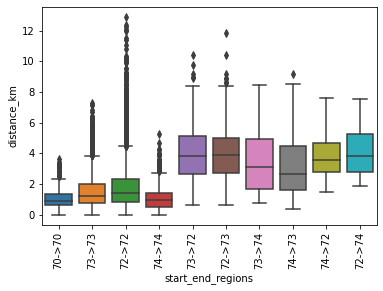

In [ ]:
# Distance distribution in each route
import seaborn as sns
import matplotlib.pyplot as plt
pandas_df = total_trips.select("start_end_regions", 'distance_km').toPandas()

ax = sns.boxplot(x="start_end_regions", y="distance_km", data=pandas_df)
labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("distance_dist_box.pdf", dpi=150)

In [ ]:
# Trip duration distribution in each route
import seaborn as sns
import matplotlib.pyplot as plt
pandas_df = total_trips.select("start_end_regions", 'tripduration').filter(total_trips.tripduration < 1e4).toPandas()

ax = sns.boxplot(x="start_end_regions", y="tripduration", data=pandas_df)
labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("tripduration_dist_box.pdf", dpi=150)

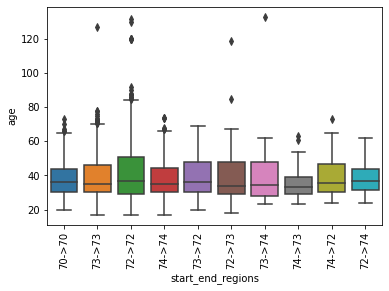

In [ ]:
# Age distribution for each route
import datetime
now = datetime.datetime.now()

merge_udf = udf(lambda input: now.year - int(input[0]) , IntegerType())
total_trips = total_trips.withColumn('age', merge_udf(struct([total_trips['birth year']])))

pandas_df = total_trips.select("start_end_regions", 'age').toPandas()

ax = sns.boxplot(x="start_end_regions", y="age", data=pandas_df)
labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("age_dist_box.pdf", dpi=150)

In [ ]:
# Entry to each station distribution during the day
from pyspark.sql.types import TimestampType


total_trips = total_trips.withColumn("starttime", total_trips["starttime"].cast(TimestampType()))
total_trips = total_trips.withColumn("stoptime", total_trips["stoptime"].cast(TimestampType()))

total_trips.show(3)


+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+-----------+-----------------+---+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|distance_km|start_end_regions|age|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+------

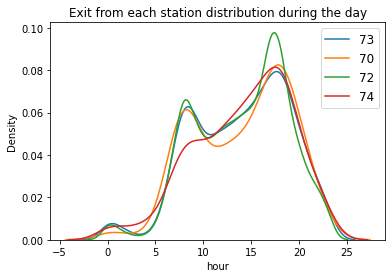

<Figure size 432x288 with 0 Axes>

In [ ]:
from pyspark.sql.functions import hour
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

tempStart = total_trips.withColumn('starttimeHour', hour(total_trips['starttime'])).select("start_region_id", 'starttimeHour')

pandas_df = tempStart.toPandas()


unique_start = tempStart.select('start_region_id').distinct().collect()
unique_start = [elm[0] for elm in unique_start]

for elm in unique_start:
    tempdf =pandas_df[pandas_df.start_region_id == elm]
    sns.distplot(tempdf['starttimeHour'], kde=True, hist = False, label=elm)

plt.legend(prop={'size': 12})
plt.title('Exit from each station distribution during the day')
plt.xlabel('hour')
plt.ylabel('Density')
plt.show()
plt.savefig("dist_hour_exit.pdf", dpi=150)

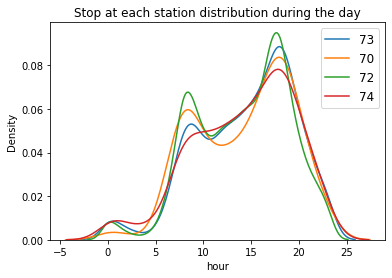

<Figure size 432x288 with 0 Axes>

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

tempStop = total_trips.withColumn('stoptimeHour', hour(total_trips['stoptime'])).select("end_region_id", 'stoptimeHour')

pandas_df = tempStop.toPandas()


unique_stop = tempStop.select('end_region_id').distinct().collect()
unique_stop = [elm[0] for elm in unique_stop]

for elm in unique_stop:
    tempdf =pandas_df[pandas_df.end_region_id == elm]
    sns.distplot(tempdf['stoptimeHour'], kde=True, hist = False, label=elm)

plt.legend(prop={'size': 12})
plt.title('Stop at each station distribution during the day')
plt.xlabel('hour')
plt.ylabel('Density')
plt.show()
plt.savefig("dist_hour_stop.pdf", dpi=150)

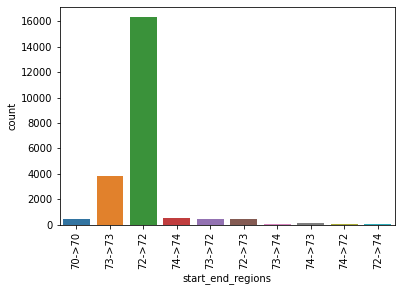

In [ ]:
# number of trips each route

pandas_df = total_trips.select("start_end_regions").toPandas()
ax = sns.countplot(x="start_end_regions", data=pandas_df)

labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("start_end_regions_count.pdf", dpi=150)

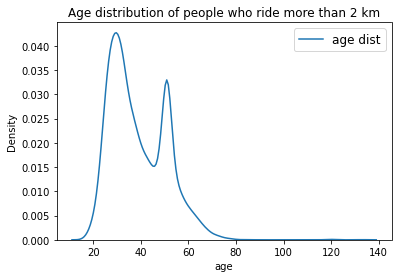

In [ ]:
temp = total_trips.filter(total_trips['distance_km'] > 2.0).select('distance_km', 'age').toPandas()
sns.distplot(temp['age'], kde=True, hist = False, label='age dist')

plt.title('Age distribution of people who ride more than 2 km')
plt.xlabel('age')
plt.legend(prop={'size': 12})
plt.ylabel('Density')
plt.savefig("age_density_1.pdf", dpi=150)

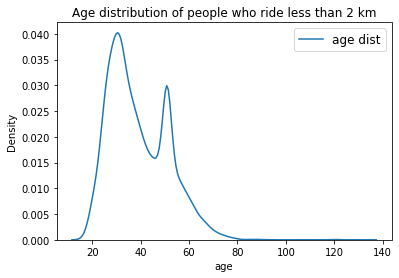

In [ ]:
temp = total_trips.filter(total_trips['distance_km'] < 2.0).select('distance_km', 'age').toPandas()
sns.distplot(temp['age'], kde=True, hist = False, label='age dist')

plt.title('Age distribution of people who ride less than 2 km')
plt.xlabel('age')
plt.legend(prop={'size': 12})
plt.ylabel('Density')
plt.savefig("age_density_2.pdf", dpi=150)

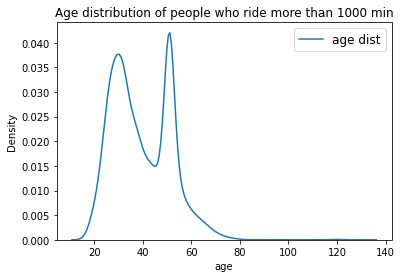

In [ ]:
temp = total_trips.filter(total_trips['tripduration'] > 1000.0).select('tripduration', 'age').toPandas()
sns.distplot(temp['age'], kde=True, hist = False, label='age dist')

plt.title('Age distribution of people who ride more than 1000 min')
plt.xlabel('age')
plt.legend(prop={'size': 12})
plt.ylabel('Density')
plt.savefig("age_tripduration_density.pdf", dpi=150)

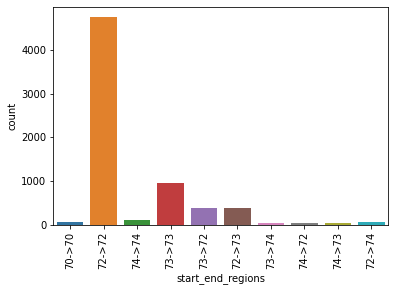

In [ ]:
# Total number of poeple who ride more 1000 min for each route

temp = total_trips.filter(total_trips['tripduration'] > 1000.0).select('tripduration', 'start_end_regions')

pandas_df = temp.select("start_end_regions").toPandas()
ax = sns.countplot(x="start_end_regions", data=pandas_df)

labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("start_end_regions_1.pdf", dpi=150)

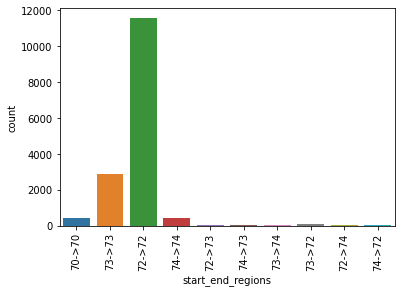

In [ ]:
# Total number of poeple who ride less 1000 min for each route

temp = total_trips.filter(total_trips['tripduration'] < 1000.0).select('tripduration', 'start_end_regions')

pandas_df = temp.select("start_end_regions").toPandas()
ax = sns.countplot(x="start_end_regions", data=pandas_df)

labels = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("start_end_regions_2.pdf", dpi=150)

Discuss when the bike should be returned to station 72



# <font color=brown> Task 7 [50 pts.]: Percentage Availability for April 2019 </font>

Let us consider `citibike_processed_tripdata-201904-NYC.csv` for this task. As the file name indicates, this file contains processed bike data for April 2019 for the NYC region. Specifically, this dataset includes number of available bikes, number of available (empty) docks, total number of docks (capacity) at each bike station at certain intervals of each day in April 2019. Process this dataset further to obtain information such as

`station_id, station_name, percent_empty, percent_full`

where `percent_empty` indicates percentage of time a particular station is empty, i.e., no bikes are available; and `percent_full` indicates percentage of time a particular station is full, i.e., all bikes are at the station.

Again, feel free to create more such columns to help Citibike with percentage availability analysis.

This can tell Citibike whether they need to increase capacity at certain bike stations, they need to open more bike stations in a region, etc.

In [ ]:
# Task 7 code here

# generating dataframe
from pyspark.sql.types import *
path = "/scratch/ISE495/bike_data/citibike_processed_tripdata-201904-NYC.csv"

NYCProcessedTripDF = sc.textFile(path).map(lambda a: a.split('\t'))

header = [elm for elm in NYCProcessedTripDF.first()]
NYCProcessedTripDF = NYCProcessedTripDF.filter(lambda line : line[0] != header[0] )
NYCProcessedTripDF = NYCProcessedTripDF.toDF()

for ind, column in enumerate(NYCProcessedTripDF.columns):
    NYCProcessedTripDF = NYCProcessedTripDF.withColumnRenamed(column, header[ind])

NYCProcessedTripDF
NYCProcessedTripDF.show(3)

+----------+------------------+----------+----+------+---+-----------+-----------+---------+---------+----------+----------+----------+
|station_id|      station_name|      date|hour|minute| pm|avail_bikes|avail_docks|tot_docks|     _lat|     _long|in_service|status_key|
+----------+------------------+----------+----+------+---+-----------+-----------+---------+---------+----------+----------+----------+
|        72|"W 52 St & 11 Ave"|"19-04-02"|   4|    56|  1|          6|         49|       55|40.767272|-73.993929|         1|         1|
|        72|"W 52 St & 11 Ave"|"19-04-02"|   5|    36|  1|          1|         54|       55|40.767272|-73.993929|         1|         1|
|        72|"W 52 St & 11 Ave"|"19-04-02"|   6|    16|  1|          4|         51|       55|40.767272|-73.993929|         1|         1|
+----------+------------------+----------+----+------+---+-----------+-----------+---------+---------+----------+----------+----------+
only showing top 3 rows



In [ ]:
from pyspark.sql.functions import unix_timestamp, from_unixtime

# Removing out of service stations and exterating necessary columns
NYCProcessedTripDF = NYCProcessedTripDF.filter(NYCProcessedTripDF.in_service == '1')\
                    .select([c for c in NYCProcessedTripDF.columns if c not in \
                             {'in_service', 'status_key','_lat', '_long'}])

# Changing the data format
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("station_id", NYCProcessedTripDF["station_id"].cast(IntegerType()) )
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("hour", NYCProcessedTripDF["hour"].cast(IntegerType()) )
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("minute", NYCProcessedTripDF["minute"].cast(IntegerType()) )
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("avail_bikes", NYCProcessedTripDF["avail_bikes"].cast(IntegerType()) )
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("avail_docks", NYCProcessedTripDF["avail_docks"].cast(IntegerType()) )
NYCProcessedTripDF = NYCProcessedTripDF.withColumn("tot_docks", NYCProcessedTripDF["tot_docks"].cast(IntegerType()) )


NYCProcessedTripDF.show(3)

+----------+------------------+----------+----+------+---+-----------+-----------+---------+
|station_id|      station_name|      date|hour|minute| pm|avail_bikes|avail_docks|tot_docks|
+----------+------------------+----------+----+------+---+-----------+-----------+---------+
|        72|"W 52 St & 11 Ave"|"19-04-02"|   4|    56|  1|          6|         49|       55|
|        72|"W 52 St & 11 Ave"|"19-04-02"|   5|    36|  1|          1|         54|       55|
|        72|"W 52 St & 11 Ave"|"19-04-02"|   6|    16|  1|          4|         51|       55|
+----------+------------------+----------+----+------+---+-----------+-----------+---------+
only showing top 3 rows



In [ ]:
# creating a time stamp from columns date hour minute and pm

import datetime
from pyspark.sql.functions import udf, struct

def extractTimestamp(row):
    date = row[0][1:-1].split('-')
    year = 2000 + int(date[0])
    month = int(date[1])
    day = int(date[2])
    hour = (int(row[1]) + (12 if row[3] == '1' else 0) + int(round(row[2]/60,0))) % 24
    hour = 12 if (row[3] == '1' and row[1]== 12) else hour
    hour = 0 if (row[3] == '0' and row[1]== 12) else hour
    time = datetime.datetime(year=year,month=month,day=day,hour=hour)
    return time

extractTimestamp_udf = udf(lambda row: extractTimestamp(row), TimestampType())
NYCProcessedTripDF = NYCProcessedTripDF.withColumn('time', extractTimestamp_udf(struct('date', 'hour', 'minute', 'pm')))\
                    .select('station_id', 'station_name','time', 'avail_bikes', 'avail_docks', 'tot_docks')

NYCProcessedTripDF.show(3)

+----------+------------------+-------------------+-----------+-----------+---------+
|station_id|      station_name|               time|avail_bikes|avail_docks|tot_docks|
+----------+------------------+-------------------+-----------+-----------+---------+
|        72|"W 52 St & 11 Ave"|2019-04-02 17:00:00|          6|         49|       55|
|        72|"W 52 St & 11 Ave"|2019-04-02 18:00:00|          1|         54|       55|
|        72|"W 52 St & 11 Ave"|2019-04-02 18:00:00|          4|         51|       55|
+----------+------------------+-------------------+-----------+-----------+---------+
only showing top 3 rows



In [ ]:
def createKeyforGroup(row):
    full = empty = partial  = 0
    if row[3] == 0:
        empty = 1
    elif row[4] == 0:
        full = 1
    else:
        partial = 1

    return (row[0], row[1][1:-1] , row[2].hour, empty, partial, full, 1)

NYCProcessedTripRDDHour = NYCProcessedTripDF.rdd.map(tuple).map(createKeyforGroup).cache()

In [ ]:
availabilityDF = NYCProcessedTripRDDHour.map(lambda a: (a[:3],a[3:-1]) ).\
                reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1], a[2]+b[2])).\
                map(lambda a: a[0]+a[1]).\
                toDF(['station_id', 'station_name','hour', 'empty', 'partial' , 'full'])
availabilityDF.show(3)

+----------+----------------+----+-----+-------+----+
|station_id|    station_name|hour|empty|partial|full|
+----------+----------------+----+-----+-------+----+
|        72|W 52 St & 11 Ave|  17|    3|     28|   0|
|        72|W 52 St & 11 Ave|  19|    2|     34|   0|
|        72|W 52 St & 11 Ave|  21|    1|     32|   0|
+----------+----------------+----+-----+-------+----+
only showing top 3 rows



In [ ]:
totalDF = NYCProcessedTripRDDHour.map(lambda a: ((a[:3]), a[-1])).\
                        reduceByKey(lambda a,b: a+b).\
                        map(lambda a: (a[0][0], a[0][2],a[1])).\
                        toDF(['station_idT','hourT', 'numberT' ]).cache()
totalDF.show(3)

+-----------+-----+-------+
|station_idT|hourT|numberT|
+-----------+-----+-------+
|       3102|   20|     28|
|       3102|   22|     36|
|       3102|    0|     47|
+-----------+-----+-------+
only showing top 3 rows



In [ ]:
tempDF = availabilityDF.join(totalDF, (availabilityDF.station_id == totalDF.station_idT ) & \
                         (availabilityDF.hour == totalDF.hourT)) \
                         .select('station_id', 'station_name','hour', 'empty', 'partial' , 'full','numberT')
tempDF.show(3)

+----------+----------------+----+-----+-------+----+-------+
|station_id|    station_name|hour|empty|partial|full|numberT|
+----------+----------------+----+-----+-------+----+-------+
|        72|W 52 St & 11 Ave|  17|    3|     28|   0|     31|
|        72|W 52 St & 11 Ave|  19|    2|     34|   0|     36|
|        72|W 52 St & 11 Ave|  21|    1|     32|   0|     33|
+----------+----------------+----+-----+-------+----+-------+
only showing top 3 rows



In [ ]:
stationHourDF = tempDF.rdd.map(tuple).map(lambda a: (a[0], a[1], a[2], \
                                 round(100*float(a[3]/a[-1]),1),\
                                 round(100*float(a[4]/a[-1]),1),\
                                 round(100*float(a[5]/a[-1]),1)) )\
                                 .toDF(['station_id', 'station_name','hour', 'empty', 'partial' , 'full'])

stationHourDF.show(3)

+----------+----------------+----+-----+-------+----+
|station_id|    station_name|hour|empty|partial|full|
+----------+----------------+----+-----+-------+----+
|        72|W 52 St & 11 Ave|  17|  9.7|   90.3| 0.0|
|        72|W 52 St & 11 Ave|  19|  5.6|   94.4| 0.0|
|        72|W 52 St & 11 Ave|  21|  3.0|   97.0| 0.0|
+----------+----------------+----+-----+-------+----+
only showing top 3 rows



In [ ]:
stationHourDF.filter(stationHourDF.empty > 15).count()

2881

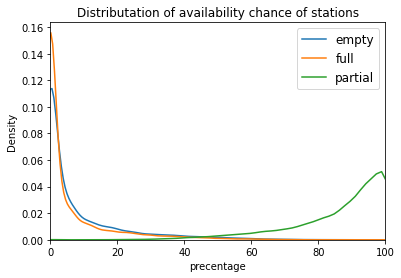

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

stationHourDFPanda =stationHourDF.toPandas()
sns.distplot(stationHourDFPanda['empty'], kde=True, hist = False, label='empty')

sns.distplot(stationHourDFPanda['full'], kde=True, hist = False, label='full')
sns.distplot(stationHourDFPanda['partial'], kde=True, hist = False, label='partial')
plt.title('Distributation of availability chance of stations')
plt.xlabel('precentage')
plt.legend(prop={'size': 12})
plt.xlim(0, 100)
plt.ylabel('Density')
plt.savefig("dist_station_usage.pdf", dpi=150)

In [ ]:
# Station-hours that are empty more than 80 precent of times
stationHourDF.filter(stationHourDF.empty > 80).orderBy(stationHourDF.columns, ascending=False).show()

+----------+--------------------+----+-----+-------+----+
|station_id|        station_name|hour|empty|partial|full|
+----------+--------------------+----+-----+-------+----+
|      3443|     W 52 St & 6 Ave|  23| 80.6|   19.4| 0.0|
|      3357|W 106 St & Amster...|  13| 81.2|   18.8| 0.0|
|      3302|Columbus Ave & W ...|  16| 81.5|   18.5| 0.0|
|      3302|Columbus Ave & W ...|  14| 83.3|   16.7| 0.0|
|       520|     W 52 St & 5 Ave|  22| 80.6|   19.4| 0.0|
|       520|     W 52 St & 5 Ave|   1| 82.4|   17.6| 0.0|
|       493|W 45 St & 6 Ave (...|  23|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|  22|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|  21|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|  20|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|   5|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|   4|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|   3|100.0|    0.0| 0.0|
|       493|W 45 St & 6 Ave (...|   2|100.0|    0.0| 0.0|
|       493|  

In [ ]:
import pyspark.sql.functions as func

# Stations that needs more bikes; the number of hours that they are empty by probability larger than 50
stationHourDF.filter(stationHourDF.empty > 50).\
                    groupby('station_id', 'station_name').\
                    agg(func.count(func.lit(1)).\
                        alias("How many hours")).\
                        orderBy("How many hours", ascending=False).show()

+----------+--------------------+--------------+
|station_id|        station_name|How many hours|
+----------+--------------------+--------------+
|      3235|E 41 St & Madison...|            11|
|       456|E 53 St & Madison...|            11|
|       484|     W 44 St & 5 Ave|            10|
|      3457|E 58 St & Madison...|             9|
|       520|     W 52 St & 5 Ave|             9|
|      3132|E 59 St & Madison...|             8|
|       522|E 51 St & Lexingt...|             8|
|       485|     W 37 St & 5 Ave|             8|
|      3302|Columbus Ave & W ...|             8|
|       493|W 45 St & 6 Ave (...|             8|
|      3231|  E 67 St & Park Ave|             8|
|      3443|     W 52 St & 6 Ave|             8|
|      3345|Madison Ave & E 9...|             7|
|      3233|     E 48 St & 5 Ave|             7|
|      3195|             Sip Ave|             7|
|       469|  Broadway & W 53 St|             7|
|      3186|       Grove St PATH|             7|
|      3458|     W 5

In [ ]:
# Station-hours that are full more than 70 precent of times
stationHourDF.filter(stationHourDF.full > 70).orderBy(stationHourDF.columns, ascending=False).show()

+----------+--------------------+----+-----+-------+-----+
|station_id|        station_name|hour|empty|partial| full|
+----------+--------------------+----+-----+-------+-----+
|      3404|        7 St & 5 Ave|   6|  0.0|   29.4| 70.6|
|      3404|        7 St & 5 Ave|   2|  0.0|   27.8| 72.2|
|      3397|Court St & Nelson St|   1|  0.0|   29.4| 70.6|
|      3371|        4 Ave & 2 St|  23|  0.0|   20.0| 80.0|
|      3371|        4 Ave & 2 St|   0|  0.0|   28.6| 71.4|
|      3332| Degraw St & Hoyt St|   5|  0.0|   28.6| 71.4|
|      3332| Degraw St & Hoyt St|   3|  0.0|   26.7| 73.3|
|      3332| Degraw St & Hoyt St|   1|  0.0|   29.4| 70.6|
|      3322|       12 St & 4 Ave|   5|  0.0|   28.6| 71.4|
|      3322|       12 St & 4 Ave|   1|  0.0|   29.4| 70.6|
|       493|W 45 St & 6 Ave (...|  11|  0.0|    0.0|100.0|
|       493|W 45 St & 6 Ave (...|  10|  0.0|    0.0|100.0|
+----------+--------------------+----+-----+-------+-----+



In [ ]:
import pyspark.sql.functions as func

# Stations that have more capacity than what they need the number of hours that they are full by probability larger than 50
stationHourDF.filter(stationHourDF.full > 50).\
                    groupby('station_id', 'station_name').\
                    agg(func.count(func.lit(1)).\
                        alias("How many hours")).\
                        orderBy("How many hours", ascending=False).show()

+----------+--------------------+--------------+
|station_id|        station_name|How many hours|
+----------+--------------------+--------------+
|      3371|        4 Ave & 2 St|            12|
|      3404|        7 St & 5 Ave|            12|
|      3322|       12 St & 4 Ave|            11|
|      3332| Degraw St & Hoyt St|             9|
|      3401|        2 Ave & 9 St|             8|
|      3333|Columbia St & Lor...|             8|
|      3368|        5 Ave & 3 St|             8|
|      3403|        4 Ave & 9 St|             7|
|      3339| Berkeley Pl & 6 Ave|             6|
|      3319|       14 St & 5 Ave|             6|
|      3315|Henry St & Degraw St|             6|
|      3377|Carroll St & Bond St|             6|
|      3106|Driggs Ave & N He...|             5|
|      3324|       3 Ave & 14 St|             5|
|       340|Madison St & Clin...|             5|
|      3397|Court St & Nelson St|             4|
|       356|Bialystoker Pl & ...|             4|
|      3405|        

In [ ]:
stationHourDF.filter(stationHourDF.full > 60).groupby('station_id', 'station_name').agg(func.count(func.lit(1)).alias("How many hours"))

DataFrame[station_id: bigint, station_name: string, How many hours: bigint]

# <font color=brown> Task 8 [Highly Open-ended, 80 pts.]: Suggestions to Citibike </font>

Could you provide some suggestions to CitiBike on how to improve their business? Think about ways they could decrease cost, get more customers, improve quality of service, etc.

**Note:** You may need to augument the dataset for this task.

**Hint:** This data is highly versatile in nature. For example, https://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/ should give you a few ideas. But feel free to search online for many more interesting ideas for analysis and observations.

In [ ]:
# Task 8 code here
from pyspark.sql.types import *
import datetime
path = "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"
NYCTripDF = ss.read.csv(path, header='true')

#NYCTripDF.printSchema()
NYCTripDF.show(3)

# NYCTripDF = NYCTripDF.sample(False, 1e-1, seed=0).cache()


path = "/scratch/ISE495/bike_data/station_information.json"
stationDF = ss.read.json(path)

# stationDF.printSchema()
stationDF.show(3)
stationDF = stationDF.withColumn("station_id", stationDF["station_id"].cast(IntegerType()) )

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|         327|2019-09-01 00:00:...|2019-09-01 00:05:...|            3733|  Avenue C & E 18 St|             40.730563|             -73.973984|           504|     1 Ave & E 16 St|         40.73221853|         -73.98165557| 39213|Su

In [ ]:
# Extract the data for people have the same birth year gender final destination-hour
from pyspark.sql.functions import col
from pyspark.sql.functions import round, udf, struct
from pyspark.sql import functions as F
import datetime

unqIdenDF = NYCTripDF.select(col('birth year').alias('birth_year'), 'gender', col('start station id').alias('originId'), \
                             col('end station id').alias('destId'), 'usertype' ,'tripduration', 'bikeid', 'starttime', 'stoptime')


now = datetime.datetime.now()

merge_udf = udf(lambda input: now.year - int(input[0]) , IntegerType())
unqIdenDF = unqIdenDF.withColumn('age', merge_udf(struct([unqIdenDF['birth_year']])))


unqIdenDF = unqIdenDF.withColumn("tripduration", unqIdenDF["tripduration"].cast(IntegerType()) )
# unqIdenDF = unqIdenDF.withColumn('stoptime', F.date_trunc('hour', unqIdenDF.stoptime)).cache()
unqIdenDF.show(3)

+----------+------+--------+------+----------+------------+------+--------------------+--------------------+---+
|birth_year|gender|originId|destId|  usertype|tripduration|bikeid|           starttime|            stoptime|age|
+----------+------+--------+------+----------+------------+------+--------------------+--------------------+---+
|      1968|     1|    3733|   504|Subscriber|         327| 39213|2019-09-01 00:00:...|2019-09-01 00:05:...| 52|
|      1969|     0|    3329|   270|  Customer|        1145| 21257|2019-09-01 00:00:...|2019-09-01 00:19:...| 51|
|      1969|     0|    3168|   423|  Customer|        1293| 15242|2019-09-01 00:00:...|2019-09-01 00:21:...| 51|
+----------+------+--------+------+----------+------------+------+--------------------+--------------------+---+
only showing top 3 rows



In [ ]:
unqIdenDF.count()

2444900

In [ ]:
#Stations which bikers return back to them (The purpose of these trips could be for exersice)
unqIdenDF.filter(unqIdenDF['originId'] == unqIdenDF['destId']).\
        select('originId').\
        groupBy('originId').\
        count().\
        orderBy('count', ascending=False).\
        select('count').\
        summary().\
        show()

unqIdenDF.filter(unqIdenDF['originId'] == unqIdenDF['destId']).\
        select('originId').\
        groupBy('originId').\
        count().\
        orderBy('count', ascending=False).\
        show(10)

+-------+-----------------+
|summary|            count|
+-------+-----------------+
|  count|              802|
|   mean|68.21321695760598|
| stddev|81.72348050464484|
|    min|                1|
|    25%|               24|
|    50%|               46|
|    75%|               86|
|    max|              881|
+-------+-----------------+

+--------+-----+
|originId|count|
+--------+-----+
|    2006|  881|
|    3254|  854|
|    3182|  814|
|    3423|  658|
|     499|  495|
|     514|  457|
|    3165|  434|
|    3724|  425|
|     426|  424|
|     387|  417|
+--------+-----+
only showing top 10 rows



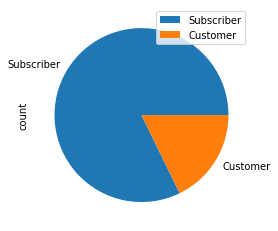

In [ ]:
# precentage of subscribers in total
import matplotlib.pyplot as plt

userTypeDF = unqIdenDF.select('usertype').\
            groupBy('usertype').\
            count().\
            toPandas()
userTypeDF.set_index('usertype', inplace=True)
a = userTypeDF.plot.pie(y='count')

In [ ]:
# stations with more customers than subscribers
unqIdenDF.filter(unqIdenDF['usertype']=='Customer').\
        groupBy('birth_year', 'gender', 'originId', 'destId').\
        count().\
        summary().\
        show()


+-------+------------------+------------------+------------------+------------------+------------------+
|summary|        birth_year|            gender|          originId|            destId|             count|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|            281145|            281145|            281145|            281145|            281145|
|   mean|1983.1174980881751|1.0712692738622418|1789.4042896014512| 1788.960369204503|1.5451350726493447|
| stddev|11.616948788779455|0.7158529874711859|1494.8318081795283|1495.8743649689966|3.0502725559752464|
|    min|              1885|                 0|               116|               116|                 1|
|    25%|            1969.0|               1.0|             387.0|             387.0|                 1|
|    50%|            1987.0|               1.0|             530.0|             530.0|                 1|
|    75%|            1993.0|               2.0|        

In [ ]:
# look at the age for customer user
cUserDF = unqIdenDF.filter(unqIdenDF['usertype']=='Subscriber').\
        groupBy('age', 'gender', 'originId', 'destId').\
        count().alias('count').\
        orderBy('count', ascending= False)

cUserDF.show(5)
cUserDF.count()

+---+------+--------+------+-----+
|age|gender|originId|destId|count|
+---+------+--------+------+-----+
| 50|     1|     312|   312|  132|
| 50|     1|     284|   284|   92|
| 32|     1|    3064|  3064|   84|
| 53|     1|    2008|   363|   82|
| 22|     1|    3671|  3671|   73|
+---+------+--------+------+-----+
only showing top 5 rows



1117165

In [ ]:
sUserDF = unqIdenDF.filter(unqIdenDF['usertype']=='Customer').\
        groupBy('age', 'gender', 'originId', 'destId').\
        count().alias('count').\
        orderBy('count', ascending= False)

sUserDF.show(5)
sUserDF.count()

+---+------+--------+------+-----+
|age|gender|originId|destId|count|
+---+------+--------+------+-----+
| 51|     0|    2006|  3282|  364|
| 51|     0|    3254|  3254|  332|
| 51|     0|    2006|  2006|  302|
| 51|     0|    3182|  3254|  267|
| 51|     0|    3254|  3479|  256|
+---+------+--------+------+-----+
only showing top 5 rows



281145

In [ ]:
ageDistCus = cUserDF.groupBy('age').\
            sum('count').\
            alias('sum').\
            orderBy('sum(count)', ascending= False).cache()

ageDistCus.show(3)

ageDistSub = sUserDF.groupBy('age').\
            sum('count').\
            alias('sum').\
            orderBy('sum(count)', ascending= False).cache()

ageDistSub.show(3)
ageDistSub = ageDistSub.withColumn('sum(count)',- ageDistSub['sum(count)'].cast(IntegerType()) )

+---+----------+
|age|sum(count)|
+---+----------+
| 30|     88781|
| 31|     87232|
| 29|     84859|
+---+----------+
only showing top 3 rows

+---+----------+
|age|sum(count)|
+---+----------+
| 51|    169581|
| 31|     17062|
| 26|     16214|
+---+----------+
only showing top 3 rows



(15.0, 80.0)

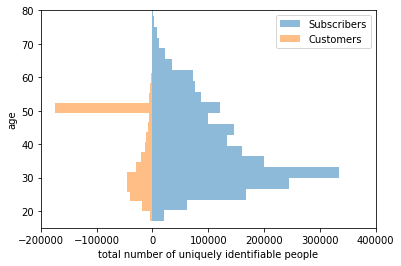

In [ ]:
# age distributatioon of uniquely identifiable custmoers and subscribers
from matplotlib.pyplot import hist
import matplotlib.ticker as mtick

pandas_df = ageDistCus.toPandas()
plt.hist(pandas_df.age, weights= pandas_df['sum(count)'],  bins=40,  alpha=0.5,  orientation="horizontal",label='Subscribers')

pandas_df2 = ageDistSub.toPandas()
plt.hist(pandas_df2.age, weights= pandas_df2['sum(count)'],  bins=40,  alpha=0.5,  orientation="horizontal", label='Customers')

plt.legend()
plt.xlabel('total number of uniquely identifiable people')
plt.ylabel('age')

a = plt.xlim(xmin=-2e5, xmax = 4e5)
plt.ylim(ymin=15, ymax = 80)

In [ ]:
unqIdenDF.groupBy('gender').count().show()

+------+-------+
|gender|  count|
+------+-------+
|     0| 205985|
|     1|1612056|
|     2| 626859|
+------+-------+



# <font color=brown> Task 9 [50 pts.]: Percentage Availability for September 2019 </font>

### This question is ONLY for those teams with at least one graduate student on the team.

### Teams with all undergraduate students may attempt this for bonus points :).

Based on the September 2019 dataset, find percentage availability similar to Task 7 (i.e., `percent_empty, percent_full`, etc) for any one Manhattan bike station.

In [ ]:
# Task 9 code here
from pyspark.sql.types import *
import datetime
path = "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"
NYCTripDF = ss.read.csv(path, header='true')

#NYCTripDF.printSchema()
NYCTripDF.show(3)

# NYCTripDF = NYCTripDF.sample(False, 1e-4, seed=0).cache()


path = "/scratch/ISE495/bike_data/station_information.json"
stationDF = ss.read.json(path)

# stationDF.printSchema()
stationDF.show(3)
stationDF = stationDF.withColumn("station_id", stationDF["station_id"].cast(IntegerType()) )

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+
|         327|2019-09-01 00:00:...|2019-09-01 00:05:...|            3733|  Avenue C & E 18 St|             40.730563|             -73.973984|           504|     1 Ave & E 16 St|         40.73221853|         -73.98165557| 39213|Su

In [ ]:
# extract 'legacy_id' and 'region_id' columns from stationDF Data Frame
stationIdDF= stationDF[['legacy_id','region_id']]

# rename the name of column 'start station id'
NYCTripDF = NYCTripDF.withColumn("start_station_id", NYCTripDF["start station id"].cast(IntegerType()) )
NYCTripDF = NYCTripDF.withColumn("end_station_id", NYCTripDF["end station id"].cast(IntegerType()) )

# add name of strating regin to NYCTrip
newDf = NYCTripDF.join(stationIdDF, NYCTripDF.start_station_id == stationIdDF.legacy_id )

newDf = newDf.drop('legacy_id')

# rename the name of column 'region_id
newDf = newDf.withColumnRenamed('region_id', 'start_region_id')

# add name of strating regin to newDf
NYC_reginPair_DF = newDf.join(stationIdDF, newDf.end_station_id == stationIdDF.legacy_id )

# rename the name of column 'region_id
NYC_reginPair_DF = NYC_reginPair_DF.withColumnRenamed('region_id', 'end_region_id')

# remooving extra columns
NYC_reginPair_DF = NYC_reginPair_DF.drop('legacy_id').cache()

NYC_reginPair_DF.show(3)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|         327|2019-09-01 00:00:...|2019-09-

In [ ]:
path = "/scratch/ISE495/bike_data/system_regions.json"
regionDataPath = ss.read.json(path)
regionDataPath.printSchema()
regionDataPath.show()

root
 |-- name: string (nullable = true)
 |-- region_id: string (nullable = true)

+-----------+---------+
|       name|region_id|
+-----------+---------+
|JC District|       70|
|  Manhattan|       72|
|   Brooklyn|       73|
|     Queens|       74|
|  The Bronx|       75|
+-----------+---------+



In [ ]:
# the trips that at least enter to or exist from region 72
ManhattanDF = NYC_reginPair_DF.filter((NYC_reginPair_DF.start_region_id=='72') | (NYC_reginPair_DF.end_region_id=='72')).cache()

ManhattanDF = ManhattanDF.withColumn('starttime', ManhattanDF["starttime"].cast(TimestampType()) )
ManhattanDF = ManhattanDF.withColumn('stoptime', ManhattanDF["stoptime"].cast(TimestampType()) )

ManhattanDF.show(3)

+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|tripduration|           starttime|            stoptime|start station id|start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|start_station_id|end_station_id|start_region_id|end_region_id|
+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----------------+--------------+---------------+-------------+
|         327|2019-09-01 00:00:...|2019-09-01 00:

In [ ]:
# Stations that exist a bike from them
from pyspark.sql.functions import lit,unix_timestamp
from pyspark.sql.functions import col
ManhattanExitDF = ManhattanDF.filter((ManhattanDF.start_region_id=='72')).\
                select(col('start_station_id').alias('station_id'), col('start station name').alias('station_name'),col('starttime').alias('time')).\
                orderBy(ManhattanDF.starttime).cache()

ManhattanExitDF = ManhattanExitDF.withColumn('available_bikes', lit(-1))


ManhattanExitDF.show(3)
ManhattanExitDF.count()

+----------+------------------+--------------------+---------------+
|station_id|      station_name|                time|available_bikes|
+----------+------------------+--------------------+---------------+
|      3733|Avenue C & E 18 St|2019-09-01 00:00:...|             -1|
|      3299|E 98 St & Park Ave|2019-09-01 00:00:...|             -1|
|       486|Broadway & W 29 St|2019-09-01 00:00:...|             -1|
+----------+------------------+--------------------+---------------+
only showing top 3 rows



1685542

In [ ]:
# Stations that entered a bike to them
from pyspark.sql.functions import col
ManhattanEnterDF = ManhattanDF.filter((ManhattanDF.end_region_id=='72')).\
                select(col('end_station_id').alias('station_id'),\
                       col('end station name').alias('station_name'),col('stoptime').alias('time')).\
                orderBy(ManhattanDF.stoptime).cache()

ManhattanEnterDF = ManhattanEnterDF.withColumn('available_bikes', lit(1))

ManhattanEnterDF.show(3)
ManhattanEnterDF.count()

+----------+----------------+--------------------+---------------+
|station_id|    station_name|                time|available_bikes|
+----------+----------------+--------------------+---------------+
|      3288| E 88 St & 1 Ave|2019-09-01 00:04:...|              1|
|       513|W 56 St & 10 Ave|2019-09-01 00:05:...|              1|
|       496| E 16 St & 5 Ave|2019-09-01 00:05:...|              1|
+----------+----------------+--------------------+---------------+
only showing top 3 rows



1682999

In [ ]:
# total number of bikes
totalNumBikes = NYC_reginPair_DF.select('bikeid').distinct().count()
totalNumBikes

# total capacity of Manhatan stations
totalCapacity = stationDF.rdd.map(tuple).map(lambda a: a[0]).reduce(lambda a, b: a+b)
totalCapacity

34441

In [ ]:
average_avail_prec = float(totalNumBikes/totalCapacity)
print("The average of number of bikes at the first of month:",average_avail_prec )

The average of number of bikes at the first of month: 0.4609331900932029


In [ ]:
# We assumed that at the first of time period half of capacity of stations is empty
from pyspark.sql.functions import rand, round

stationManhattanDF = stationDF.filter(stationDF.region_id == '72').select('station_id', col('name').alias('station_name'), 'capacity')
stationManhattanDF = stationManhattanDF.withColumn('time', lit(datetime.datetime(2019, 9, 1, 0, 0, 0, 1)))

stationManhattanDF = stationManhattanDF.select('station_id', 'station_name', 'time',col('capacity').alias('intial_value'), 'capacity' )
stationManhattanDF = stationManhattanDF.withColumn('intial_value',(2*rand()*average_avail_prec * stationManhattanDF["intial_value"]).cast(IntegerType()) )
stationManhattanDF.show(3)

+----------+--------------------+--------------------+------------+--------+
|station_id|        station_name|                time|intial_value|capacity|
+----------+--------------------+--------------------+------------+--------+
|      3959|Edgecombe Ave & W...|2019-09-01 00:00:...|          16|      31|
|      3312|     1 Ave & E 94 St|2019-09-01 00:00:...|          20|      38|
|       447|     8 Ave & W 52 St|2019-09-01 00:00:...|          24|      31|
+----------+--------------------+--------------------+------------+--------+
only showing top 3 rows



In [ ]:
# Combining all the changes in the total number of bikes available at each station

stationChangeManhattanDF = ManhattanExitDF.union(ManhattanEnterDF)
stationChangeManhattanDF = stationChangeManhattanDF.join(stationManhattanDF.\
                                                         select('station_id', 'capacity'), on=['station_id'] ,how='left')

stationChangeManhattanDF.show(3)
print("Actual number of changes: ",stationChangeManhattanDF.count())

stationChangeManhattanDF = stationChangeManhattanDF.sample(False, 0.01, seed=0)

stationChangeManhattanDF = stationChangeManhattanDF.union(stationManhattanDF)
stationChangeManhattanDF = stationChangeManhattanDF.orderBy(stationChangeManhattanDF.time).cache()

print("Size of sample of changes: ",stationChangeManhattanDF.count())

+----------+------------------+--------------------+---------------+--------+
|station_id|      station_name|                time|available_bikes|capacity|
+----------+------------------+--------------------+---------------+--------+
|      3733|Avenue C & E 18 St|2019-09-01 00:00:...|             -1|      46|
|      3299|E 98 St & Park Ave|2019-09-01 00:00:...|             -1|      25|
|       486|Broadway & W 29 St|2019-09-01 00:00:...|             -1|      41|
+----------+------------------+--------------------+---------------+--------+
only showing top 3 rows

Actual number of changes:  3368541
Size of sample of changes:  34272


In [ ]:
# Combining all the changes in the total number of bikes available at each station

stationChangeManhattanDF = ManhattanExitDF.union(ManhattanEnterDF)
stationChangeManhattanDF = stationChangeManhattanDF.join(stationManhattanDF.\
                                                         select('station_id', 'capacity'), on=['station_id'] ,how='left')

stationChangeManhattanDF.show(3)
print("Actual number of changes: ",stationChangeManhattanDF.count())

stationChangeManhattanDF = stationChangeManhattanDF.sample(False, 0.01, seed=0)

stationChangeManhattanDF = stationChangeManhattanDF.union(stationManhattanDF)
stationChangeManhattanDF = stationChangeManhattanDF.orderBy(stationChangeManhattanDF.time).cache()

print("Size of sample of changes: ",stationChangeManhattanDF.count())

+----------+------------------+--------------------+---------------+--------+
|station_id|      station_name|                time|available_bikes|capacity|
+----------+------------------+--------------------+---------------+--------+
|      3733|Avenue C & E 18 St|2019-09-01 00:00:...|             -1|      46|
|      3299|E 98 St & Park Ave|2019-09-01 00:00:...|             -1|      25|
|       486|Broadway & W 29 St|2019-09-01 00:00:...|             -1|      41|
+----------+------------------+--------------------+---------------+--------+
only showing top 3 rows

Actual number of changes:  3368541
Size of sample of changes:  34272


In [ ]:
# Sequentially iterates over the changes of bike availabilities at each station

import numpy as np
pandaStationChangeDF = stationChangeManhattanDF.orderBy('time').toPandas()
# pandaStationChangeDF = pandaStationChangeDF.sort_values(by='time')
uniqueStations = pandaStationChangeDF.station_id.unique()


old_val = {st_id:0 for st_id in list(uniqueStations)}
for index, _ in pandaStationChangeDF.iterrows():
    st_id = pandaStationChangeDF.loc[index, 'station_id']
    pandaStationChangeDF.loc[index, 'available_bikes'] = old_val[st_id] + pandaStationChangeDF.loc[index, 'available_bikes']
    old_val[st_id] = pandaStationChangeDF.loc[index, 'available_bikes']

In [ ]:
from pyspark.sql.types import *

# Auxiliar functions
def equivalent_type(f):
    if f == 'datetime64[ns]': return TimestampType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)


# Given pandas dataframe, it will return a spark's dataframe.
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types):
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return ss.createDataFrame(pandas_df, p_schema)

In [ ]:
stationHourAvailDF = pandas_to_spark(pandaStationChangeDF)
stationHourAvailDF.filter(stationHourAvailDF['station_id'] == 3136).show()

+----------+---------------+--------------------+---------------+--------+
|station_id|   station_name|                time|available_bikes|capacity|
+----------+---------------+--------------------+---------------+--------+
|      3136|5 Ave & E 63 St|2019-09-01 00:00:...|             40|      47|
|      3136|5 Ave & E 63 St|2019-09-01 11:50:...|             39|      47|
|      3136|5 Ave & E 63 St|2019-09-01 13:54:...|             38|      47|
|      3136|5 Ave & E 63 St|2019-09-01 14:00:...|             39|      47|
|      3136|5 Ave & E 63 St|2019-09-01 14:43:...|             40|      47|
|      3136|5 Ave & E 63 St|2019-09-01 15:24:...|             39|      47|
|      3136|5 Ave & E 63 St|2019-09-01 15:31:...|             40|      47|
|      3136|5 Ave & E 63 St|2019-09-02 21:45:...|             39|      47|
|      3136|5 Ave & E 63 St|2019-09-03 09:48:...|             40|      47|
|      3136|5 Ave & E 63 St|2019-09-04 08:17:...|             39|      47|
|      3136|5 Ave & E 63 

In [ ]:
from datetime import date
def createKeyforGroup(row):
    full = empty = partial  = 0
    if row[3] <= 0:
        empty = 1
    elif row[3] == row[4]:
        full = 1
    else:
        partial = 1

    return (row[0], row[1] , row[2].hour, empty, partial, full)

# We do the analysis just for week days
stationHourAvailRDD = stationHourAvailDF.rdd.map(tuple).filter(lambda a: date.weekday(a[2]) < 5).map(createKeyforGroup).cache()

In [ ]:
from pyspark.sql.functions import round
def precentageCal (a):
    total = sum(a[-3:])
    coef = int((100.0/total))

    return (*a[:-3], coef * a[-3], coef * a[-2], coef * a[-1])

avilPerWeekdayDF = stationHourAvailRDD.map(lambda a: (a[:3],a[3:]) ).\
                reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1], a[2]+b[2])).\
                map(lambda a: a[0]+a[1]).\
                map(precentageCal ).\
                toDF(['station_id', 'station_name','hour', 'empty', 'partial' , 'full'])
avilPerWeekdayDF.show(10)

+----------+--------------------+----+-----+-------+----+
|station_id|        station_name|hour|empty|partial|full|
+----------+--------------------+----+-----+-------+----+
|       402|  Broadway & E 22 St|   0|    0|    100|   0|
|       493|     W 45 St & 6 Ave|   0|    0|    100|   0|
|       315|South St & Gouver...|   2|    0|    100|   0|
|      3711|  E 13 St & Avenue A|   3|    0|    100|   0|
|       368|  Carmine St & 6 Ave|   3|    0|    100|   0|
|      3687|     E 33 St & 1 Ave|   7|    0|     98|   0|
|      3263|Cooper Square & A...|   8|   18|     72|   0|
|       308|St James Pl & Oli...|   8|    0|    100|   0|
|       303|Mercer St & Sprin...|   8|    0|    100|   0|
|       536|     1 Ave & E 30 St|   8|   24|     72|   0|
+----------+--------------------+----+-----+-------+----+
only showing top 10 rows



In [ ]:
avilPerWeekdayDF.filter(avilPerWeekdayDF.empty > 15).count()

823

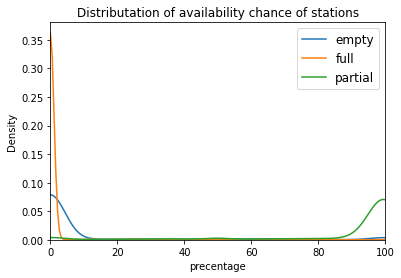

In [ ]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

stationHourDFPanda =avilPerWeekdayDF.toPandas()
sns.distplot(stationHourDFPanda['empty'], kde=True, hist = False, label='empty')

sns.distplot(stationHourDFPanda['full'], kde=True, hist = False, label='full')
sns.distplot(stationHourDFPanda['partial'], kde=True, hist = False, label='partial')
plt.title('Distributation of availability chance of stations')
plt.xlabel('precentage')
plt.legend(prop={'size': 12})
plt.xlim(0, 100)
plt.ylabel('Density')
plt.savefig("dist_station_usage.pdf", dpi=150)

# <font color=brown> BONUS Task [60 pts.]: Visualization of Trips </font>

Make some interesting and creative visualizations of the trips. This can be done in too many ways such as heat map of trips depending on density between bike stations; age-wise or gender-wise or customer type-wise block classificationo of trips, etc.

**Hint-1:** https://www.arcgis.com/apps/Cascade/index.html?appid=668b3ac098404936ad40a3da30d4c04e

**Hint-2:** https://iquantny.tumblr.com/post/81465368612/mapping-citi-bikes-riders-not-just-rides

**Hint-3:** Look at the `trip_map.png` image in your project folder.

Feel free to search online for ideas :).

**You can always ask for bonus over bonus if you visualize in some unconventional ways.**

In [ ]:
import findspark
findspark.init()
import random
import pyspark

In [ ]:
import os
lehighId =  'mos519' # Put here your Lehigh Id

config = pyspark.SparkConf().set('spark.executor.memory', '1GB')\
            .set('spark.cores.max', '2')\
            .set('spark.port.maxRetries','200')\
            .set('spark.ui.port', 4040 + hash(random.random())%200)\
            .set('spark.master', 'spark://polyp1:7077')\
            .set('spark.app.name', lehighId+" Project #1")

ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()
sc = ss.sparkContext

In [ ]:
from math import sin, cos, sqrt, atan2, radians
from pyspark.sql.functions import udf, struct
from pyspark.sql.types import DoubleType, IntegerType, StringType, FloatType

path = "/scratch/ISE495/bike_data/citibike_tripdata-201909-NYC.csv"
NYCTripDF = ss.read.csv(path, header='true')

NYCTripDF.printSchema()
NYCTripDF.show(3)

NYCTripDF = NYCTripDF.sample(False, 1e-2, seed=0)

In [ ]:
#Selecting useful information from the NYC trip file
NYCTripDF = NYCTripDF.withColumnRenamed('start station latitude', 'Slat')
NYCTripDF = NYCTripDF.withColumnRenamed('start station longitude', 'Slon')

NYCTripDF = NYCTripDF.withColumnRenamed('end station latitude', 'Elat')
NYCTripDF = NYCTripDF.withColumnRenamed('end station longitude', 'Elon')

NYCTripImDF= NYCTripDF[['Slat','Slon','Elat','Elon','birth year']]
NYCTripImDF.show(3)

In [ ]:
#Converting the year of birth to age and droping the birth year information
import datetime
now = datetime.datetime.now()
merge_udf = udf(lambda input: now.year - int(input[0]) , IntegerType())

NYCTripImDF = NYCTripImDF.withColumn('age', merge_udf(struct([NYCTripImDF['birth year']])))
NYCTripImDF = NYCTripImDF.drop('birth year')
NYCTripImDF.show(3)
NYCTripImDF.printSchema()

In [ ]:
#Converting the information in datafram from string to float
NYCTripImDF = NYCTripImDF.withColumn("Slat", NYCTripImDF["Slat"].cast(FloatType()) )
NYCTripImDF = NYCTripImDF.withColumn("Elat", NYCTripImDF["Elat"].cast(FloatType()) )
NYCTripImDF = NYCTripImDF.withColumn("Slon", NYCTripImDF["Slon"].cast(FloatType()) )
NYCTripImDF = NYCTripImDF.withColumn("Elon", NYCTripImDF["Elon"].cast(FloatType()) )

NYCTripImDF.printSchema()
NYCTripImDF.show(3)

In [ ]:
!pip3 install osmnx --user

In [ ]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

#In order to be able to show the output of plotly in google colab, I need to add these lines
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# Defining the map boundaries or better to say a limited fram to work with (due to limited computational resources).
north, east, south, west = 40.81, -73.92, 40.70, -74.07

In [ ]:
# Downloading the map as a graph object
G = ox.graph_from_bbox(north, south, east, west, network_type = 'bike')
# Plotting the map graph
ox.plot_graph(G)

In [ ]:
#Filtering the trips which are in the frame that we defined at the previous section.
NYCTripFtDF = NYCTripImDF.filter((NYCTripImDF.Slat<=north) |(NYCTripImDF.Slat>=south))
NYCTripFtDF = NYCTripFtDF.filter((NYCTripFtDF.Elat<=north) |(NYCTripFtDF.Elat>=south))

NYCTripFtDF = NYCTripFtDF.filter((NYCTripFtDF.Slon<=east) |(NYCTripFtDF.Slon>=west))
NYCTripFtDF = NYCTripFtDF.filter((NYCTripFtDF.Elon<=east) |(NYCTripFtDF.Elon>=west))
print(NYCTripFtDF.count())
NYCTripFtDF.show(3)

In [ ]:
#converting the trips to RDD
NYCTripFtRDD = NYCTripFtDF.rdd.map(tuple)
#NYCTripFtRDD = NYCTripFtRDD.map(lambda a: (round(a[0],4),round(a[1],4),round(a[2],4),round(a[3],4),a[4]))
#NYCTripFtRDD = NYCTripFtRDD.map(lambda a: (round(a[0],4),round(a[1],4),round(a[2],4),round(a[3],4),a[4]))

NYCTripFtRDD.take(3)


In [ ]:
#Take a sample AGAIN.
Df_RDD = NYCTripFtRDD.sample(False, 0.01)
print(Df_RDD.count())
NYCTripNodes = Df_RDD.collect()

In [ ]:
#Creating history for each node on the map to record how passed that node
Nodes=[]
for input in NYCTripNodes:

  origin_point = (input[0],  input[1])
  destination_point = (input[2], input[3])

  origin_node = ox.get_nearest_node(G, origin_point)
  destination_node = ox.get_nearest_node(G, destination_point)
  try:
    route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
  except:
    continue

  for x in route:
    point = G.nodes[x]
    tmp1=point['x']
    tmp1 = round(tmp1,4)

    tmp2=point['y']
    tmp2 = round(tmp2,4)

    Nodes.append([str(tmp1)+str(tmp2),(input[4],1)])

NodesRDD = sc.parallelize(Nodes)
NodesRDD.take(3)

[['-73.997840.7565', (35, 1)],
 ['-73.997340.7571', (35, 1)],
 ['-73.994540.7559', (35, 1)]]

In [ ]:
#finding the average age for each node
NodesRDD = NodesRDD.reduceByKey(lambda a,b: (a[0]+b[0],a[1]+b[1]))
#NodesRDD = NodesRDD.map(lambda a: (a[0],list(a[1])))
#NodesRDD.take(3)

In [ ]:
#finding the average age for each node
NodesRDD = NodesRDD.map(lambda a: (a[0],a[1][0]/a[1][1]))
#NodesRDD = NodesRDD.map(lambda a: (a[0],list(a[1])))
#NodesRDD.take(3)

In [ ]:
NodesRDD.take(3)

In [ ]:
#convert the RDD to dictionary, for this purpose we created a unique ID for each node
#[str(lat)+str(lon)]

AllNodesInfo = NodesRDD.collect()
AllNodesInfo = dict(AllNodesInfo)


In [ ]:
for x in range(3):
  print(NYCTripNodes[x])
print(len(NYCTripNodes))

In [ ]:
!pip3 install -U kaleido --user
!conda install -c plotly plotly-orca

In [ ]:
#drawing the lines for only those are more than SPECFICAGE age

SPECFICAGE = 40
Key = False
for p in range(30): # limited loop for the computational restriction
  input = NYCTripNodes[p]

  if input[4]< SPECFICAGE:
    continue

  origin_point = (input[0],  input[1])
  destination_point = (input[2], input[3])

  origin_node = ox.get_nearest_node(G, origin_point)
  destination_node = ox.get_nearest_node(G, destination_point)

  try:
    route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
  except:
    continue

  tmpX =[0,0]
  tmpY =[0,0]


  for x in range(1,len(route)):
    long = []
    lat = []
    Y = route[x-1]
    point = G.nodes[Y]
    tmpX[0] = point['x']
    tmpX[0] = round(tmpX[0],4)

    tmpY[0]=point['y']
    tmpY[0] = round(tmpY[0],4)

    long.append(point['x'])
    lat.append(point['y'])

    Y = route[x]
    point = G.nodes[Y]
    tmpX[1]=point['x']
    tmpX[1] = round(tmpX[1],4)

    tmpY[1]=point['y']
    tmpY[1] = round(tmpY[1],4)

    long.append(point['x'])
    lat.append(point['y'])


    NodeX= str(tmpX[0])+str(tmpY[0])
    NodeY= str(tmpX[1])+str(tmpY[1])
    Sum = AllNodesInfo[NodeX]
    Sum += AllNodesInfo[NodeY]

    Sum = Sum/2
    Sum = Sum/2

    if Key == False:
      Key = True
      fig = go.Figure(go.Scattermapbox(
      #name = "Path",
      mode = "lines",
      lon = long,
      lat = lat,
      #marker = {'size': 2},
      showlegend=False,
      line = dict(width = 5, color = 'red'),
      opacity = float(Sum) / float(70)
      ))

    else:
      fig.add_trace(go.Scattermapbox(
      #name = "Path",
      mode = "lines",
      lon = long,
      lat = lat,
      #marker = {'size': 10},
      showlegend=False,
      line = dict(width = 5, color = 'red'),
      opacity = float(Sum) / float(70)
      ))


lat_center = 40.736714
long_center = -73.987671

"""
fig.update_layout(
    #title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
"""
#"""
fig.update_layout(mapbox_style="carto-darkmatter",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  #opacity = 0.5,
                  mapbox = {
                      'center': {'lat': lat_center,
                      'lon': long_center},
                      'zoom': 12})
#"""
fig.show()

In [ ]:
#drawing the lines for all with different style
Key = False
for p in range(100):# limited loop for the computational restriction
  input = NYCTripNodes[p]

  origin_point = (input[0],  input[1])
  destination_point = (input[2], input[3])

  origin_node = ox.get_nearest_node(G, origin_point)
  destination_node = ox.get_nearest_node(G, destination_point)

  try:
    route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
  except:
    continue

  tmpX =[0,0]
  tmpY =[0,0]


  for x in range(1,len(route)):
    long = []
    lat = []
    Y = route[x-1]
    point = G.nodes[Y]
    tmpX[0] = point['x']
    tmpX[0] = round(tmpX[0],4)

    tmpY[0]=point['y']
    tmpY[0] = round(tmpY[0],4)

    long.append(point['x'])
    lat.append(point['y'])

    Y = route[x]
    point = G.nodes[Y]
    tmpX[1]=point['x']
    tmpX[1] = round(tmpX[1],4)

    tmpY[1]=point['y']
    tmpY[1] = round(tmpY[1],4)

    long.append(point['x'])
    lat.append(point['y'])


    NodeX= str(tmpX[0])+str(tmpY[0])
    NodeY= str(tmpX[1])+str(tmpY[1])
    Sum = AllNodesInfo[NodeX]
    Sum += AllNodesInfo[NodeY]

    Sum = Sum/2
    Sum = Sum/2
    CC = 'rgba(' + str(255*(float(Sum) / float(70))+0) + ',0,0,1)'

    if Key == False:
      Key = True


      fig = go.Figure(go.Scattermapbox(
      #name = "Path",
      mode = "lines",
      lon = long,
      lat = lat,
      #marker = {'size': 2},
      showlegend=False,
      line = dict(width = 2, color = CC),
      #opacity = float(Sum) / float(70)
      ))

    else:
      fig.add_trace(go.Scattermapbox(
      #name = "Path",
      mode = "lines",
      lon = long,
      lat = lat,
      #marker = {'size': 10},
      showlegend=False,
      line = dict(width = 2, color = CC),
      #opacity = float(Sum) / float(70)
      ))


lat_center = 40.736714
long_center = -73.987671

"""
fig.update_layout(
    #title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
"""
#"""
fig.update_layout(mapbox_style="carto-darkmatter")
        #mapbox_center_lat = 30, mapbox_center_lon=-80)
#fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  #opacity = 0.5,
                  mapbox = {
                      'center': {'lat': lat_center,
                      'lon': long_center},
                      'zoom': 10.5})
#"""
#fig.show()


In [ ]:
#make a directory for saving the images
import os

if not os.path.exists("images"):
    os.mkdir("images")


In [ ]:
fig.write_image("images/fig2.png")

In [ ]:
sc.stop()
ss.stop()